# Lab 5 - The LHC Particle Physics Dataset

## William Olsen, partners with Jennifer Vo

Lab 5a. Download the training datasets from one of the two pT-range folders. In each folder, there are 2 files, each containing 100k jets. The signal dataset is labeled as “higgs” and the background dataset is labeled as “qcd.”

Lab 5b. Explore the training data by addressing the following:

- Do all of the features provide discrimination power between signal and background?
- Are there correlations among these features?
- Compute the expected discovery sensitivity (significance of the expected signal) by normalizing each sample appropriately (see 'expected yields' below).
- Develop a plan to optimize the discovery sensitivity by applying selections to these features.

____________________

1. Getting started (don't turn in, but think)
- Pick and download your data
- Get familiar with your data, making sure you understand the axes, etc.
- Following the links in the data instructions, read about your instrument and how the data was taken
- Explore your data. Mostly make sure you understand what all of the labels mean, and make a few representative plots.

2. For your lab report, create an initial writeup of your data and what you found. Think of this as a book report, where you describe how the data was taken, what the labels mean, and how to interpret the first plots you've made. This will need to be several pages long. 

________________

## Introduction

Within this lab and the next four labs we will be exploring a dataset from the Large Hadron Collider (LHC).  Specifically we will be looking at proton-proton collisions with an energy of $\sqrt{s} = 13$ TeV and their product.  Our signal will be the standard Higgs Boson which is produced through proton-proton collison.

## Particle Colliders

The LHC, located beneath the Frace-Switzerland border and built by CERN, is the largest particle collider in the world.  The LHC has a loop track to accelerate particles through and produces the higest energy collisions in the world.  The collision between high energy particles produces various different particles which are then detected by one or more of the detectors around the loop.  To perform the detections, particle physisists leverage theory to observe particle decays and backtrace the original particle detected.  There are four collision points around the loop and a total of seven detecters currently in operation.  Each of these detectors is specialized to detect a specific physical phenomena.  The two frontmost detectors are the CMS detector and the ATLAS detector.  The data we are working with is from the ATLAS detector which is a detector is located in Switzerland and is designed to observe highly massive particles with large energies.  ATLAS was one of two detectors that lead to the discovery of the Higgs Boson in July 2012.

## Collision Products

As mentioned previously, the LHC accelerates particles which are then collided with one another in order to produce natrual phenomena's in a lab for observation.  Once we perform our detections, particle physics, kinematics, and special relativity theory are applied in order to determine which particles were produced.  These same techniques are used to identify properties of the produced particles such as their energy, mass, and momenta - to name a few.

## The Higgs Boson

Immediatly after the Big Bang, it is theorized that all elementary particles were massless, however today we see that these particles do have an intrinsic mass.  In 1960, a physisist named Peter Higgs proposed a theory as to how the elementary particles acquired their mass.  Higg's theory stipulates that there was a generated field - now called the Higgs Field - that a appeared shortly after the Big Bang.  Interaction with this field caused particles to acquire mass however some particles interacted differently than others resulting in different masses.  The Higgs Field is ominipresent and is only observable via the production of the quantum mechanical particle that generates the field - the Higgs Boson.  The Higgs Field is quite special as it is the first scalar quantum field discovered.  This is due to the Higgs Boson being the first elementary particle found without a quantum spin. 

The Higgs Boson is one such particle discoved via the application of particle physics, kinematics, and special relativity on data collected at the ATLAS and CMS Detectors at the LHC.  It was discovered on July 4th, 2012 when a particle with a mass in the region of $125 \ GeV/c^2$ was produced via a proton-proton collision with an energy of $13 \ TeV$ - the current world record energy for a particle collision.  The observed mass of the particle is consistent with the theory surrounding the Higgs Boson and thus it was deemed as such.  While we have an initial detection, more work is being done to determine if this particle is consistent with the Standard Model for the Higgs Boson.

Similar to other particles, the Higgs Boson is an unstable particle and quickly decays into new particles.  There are many different decays, such as decaying into four elections, but within our dataset we are trying to detect the Higgs Boson via it's decay to a bottom quark-antiquark pair.

## Experimental Details

We have already discussed how the Higgs Boson rapidly decays.  As a result, particle physisists sift through data produced by the ATLAS detector in order to identify a collection of particles that can be traced back to a Higgs Boson through one or more decays.  TODO: discuss jets and other experimental details. 



In [29]:
# general imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle

In [8]:
# lets load the data

# open the file of interest, and use pickle loading
higgsfile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgsdata = pickle.load(higgsfile)
qcdfile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcddata = pickle.load(qcdfile)

# list all keys of the files
print(f'Higgs Data keys: {higgsdata.keys()}')
print(f'QCD Data keys: {qcddata.keys()}')

Higgs Data keys: Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
QCD Data keys: Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


Now that we have loaded the signal data and background data let's explore the meaning of the keys within our dataframes.  We see that both datasets share the same key values:

**pt**:
- pt is the transverse momentum for the protons before they are collided.

**eta**:
- $\eta$ is the pseudorapidity which is a geometric property.  The pseudorapidity is used to describe the angle of the particle relative to the beam axis.  This value ranges from $-\infty$ to $\infty$ as the polar angle $\theta$ goes from $0$ to $\pi$.

**phi**:
- $\phi$ is the azmuthal angle and it goes around the beam.

**mass**:
- $mass$ is the mass of the particle produced via the collision.

**ee2**:
- The 2-point energy correlation function.  This energy correlation function is utilized for quark and gluon discrimination. 
- https://arxiv.org/pdf/1305.0007.pdf pg 1
- https://arxiv.org/pdf/1409.6298.pdf pg 5
- extra info : https://arxiv.org/pdf/1411.0665.pdf

**ee3**:
- The 3-point energy correlation function.  This energy correlation function is utilized for boosted W / Z / Higgs Boson identification.
- https://arxiv.org/pdf/1305.0007.pdf pg 1
- https://arxiv.org/pdf/1409.6298.pdf pg 5
- extra info : https://arxiv.org/pdf/1411.0665.pdf

**d2**:
- $D_2$ is written in the following way when $E_{CFi}$ is the $i$-th energy corrolation function: $D_2 = E_{CF3} * \big(\frac{E_{CF1}}{E_{CF2}}\big)^3$
- https://arxiv.org/pdf/1906.11005.pdf pg 17
- https://arxiv.org/pdf/1411.0665.pdf pg 1

**angularity**:
- Angularity is from the family of infrared-safe quantities that have characteristic distributions for two-body decays - the Higgs Boson.
- Note: Angularity is largely uncorrelated with all of the other observables.
- https://journals.aps.org/prd/pdf/10.1103/PhysRevD.86.072006 pg 1

**t1**:
- $\tau_1$ represents the 1-jettiness.  This is the sum of the angular distance of each particle to the jet center.
- https://arxiv.org/pdf/1906.11005.pdf pg 17

**t2**:
- $\tau_2$ represents the 2-jettiness.  This is the sum of the angular distance of each particle to that particle's respective jet center. With a jettiness of 2 we have two jet centers and our particles have been grouped into one or the other jet in order to minimize the value of $\tau_2$.
- https://arxiv.org/pdf/1906.11005.pdf pg 17

**t3**:
- $\tau_3$ represents the 3-jettiness.  This is the sum of the angular distance of each particle to that particle's respective jet center. With a jettiness of 3 we have three jet centers and our particles have been grouped into a jet in order to minimize the value of $\tau_3$.
- https://arxiv.org/pdf/1906.11005.pdf pg 17

**t21**:
- $\tau_{21}$ is the raito $\frac{\tau_2}{\tau_1}$.  This captures how much of an improvement we made by grouping the particles with two jets instead of one.
- https://arxiv.org/pdf/1906.11005.pdf pg 17

**t32**:
- $\tau_{32}$ is the raito $\frac{\tau_3}{\tau_2}$.  This captures how much of an improvement we made by grouping the particles with three jets instead of two.
- https://arxiv.org/pdf/1906.11005.pdf pg 17

**KtDeltaR**:
- $k_t \Delta R$ is the $\Delta R$ of two subjects within a large-R jet.  This is describing the algorithm that is being used to determine the jet centers for the particles - or the clustering algorithm.
- https://arxiv.org/pdf/1906.11005.pdf pg 17

Now that we know what information our data holds, lets count how many signal and background data points we have:

In [9]:
print(f'Number of Higgs Signal data points: {len(higgsdata)}')
print(f'Number of QCD Background data points: {len(qcddata)}')

Number of Higgs Signal data points: 100000
Number of QCD Background data points: 100000


In [10]:
higgsdata

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [11]:
qcddata

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


gluons and quarks interact strongly resulting in a large momemtnum transfer ie large enrggy event to create a new particle

produced particles jet out and decay and you detect the decayed particles

concept of a detector

In [93]:
# this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,30)
#plt.rcParams["figure.figsize"] = (20,18)

def plot_metadata(metadata_parameter):
    bins = 100
    fs = 24
    
    # plot the background
    plt.subplot(3, 1, 1)
    n_qcd, bins_qcd, z = plt.hist(qcddata[f'{metadata_parameter}'], bins=bins)
    plt.title('QCD Background', fontsize=fs)
    plt.tick_params(labelsize=fs)
    plt.xlabel(f'{metadata_parameter}', fontsize=fs)
    plt.ylabel('Event counts', fontsize=fs)

    # plot the signal
    plt.subplot(3, 1, 2)
    n_higgs, bins_higgs, z = plt.hist(higgsdata[f'{metadata_parameter}'], bins=bins)
    plt.title('Higgs Boson Signal', fontsize=fs)
    plt.tick_params(labelsize=fs)
    plt.xlabel(f' {metadata_parameter}', fontsize=fs)
    plt.ylabel('Event counts', fontsize=fs)
    
    # determine the difference between the above data
    n_diff = n_higgs - n_qcd
    bins_diff = np.zeros(len(bins_higgs)-1)
    for i in range(0, len(bins_higgs)-1):
        bins_diff[i] = (bins_higgs[i+1] + bins_higgs[i]) / 2
     
    # plot the difference between the above histograms
    plt.subplot(3, 1, 3)
    plt.bar(bins_diff, n_diff, width=1)
    plt.title('Higgs Boson Signal Histogram - QCD Background Histogram', fontsize=fs)
    plt.tick_params(labelsize=fs)
    plt.xlabel(f'{metadata_parameter}', fontsize=fs)
    plt.ylabel('Event counts', fontsize=fs)
    
    plt.show()

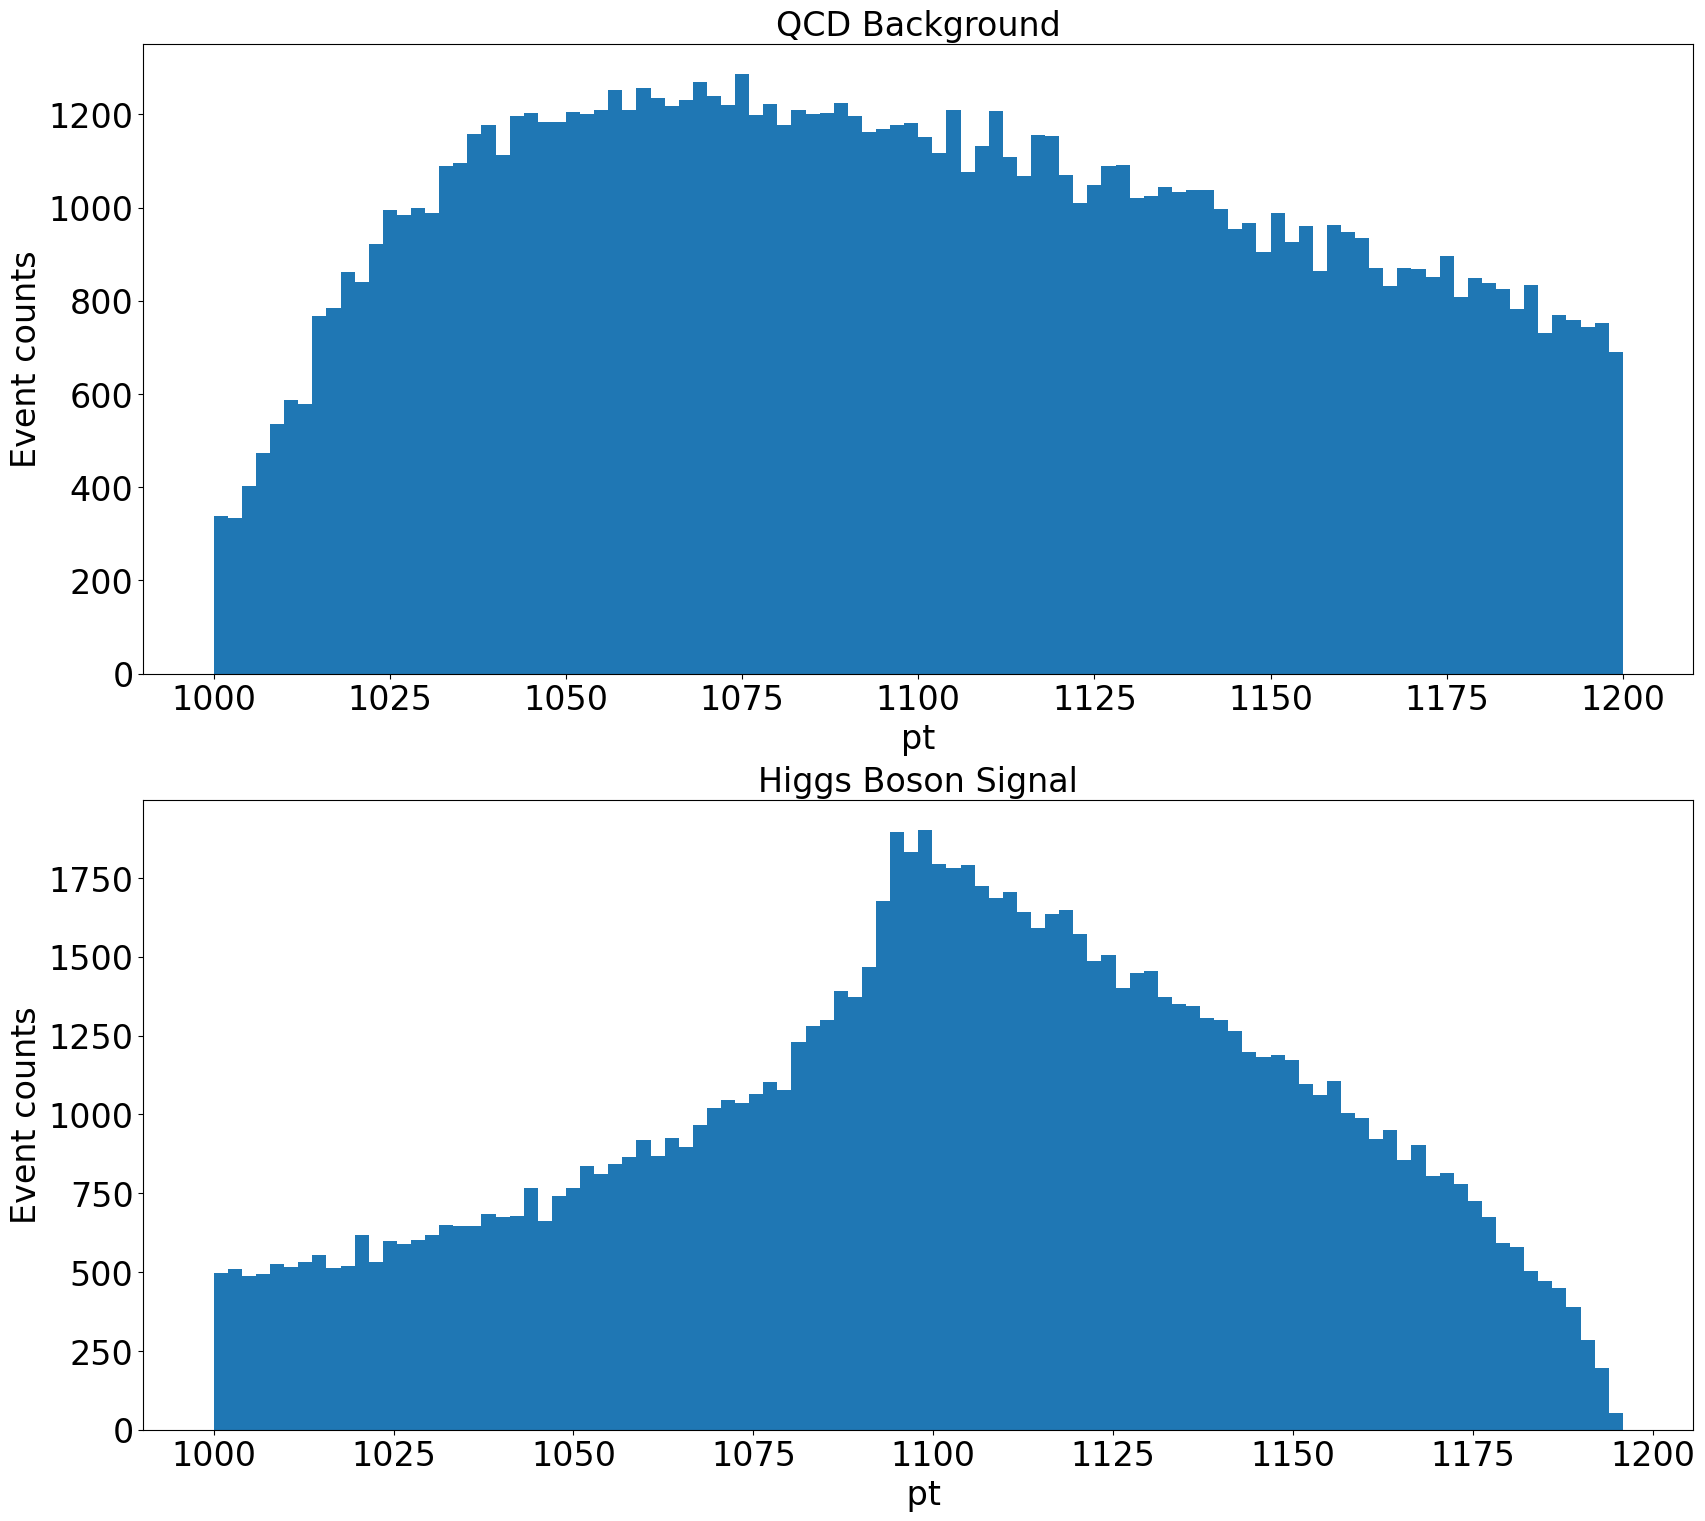

In [92]:
plot_metadata('pt')

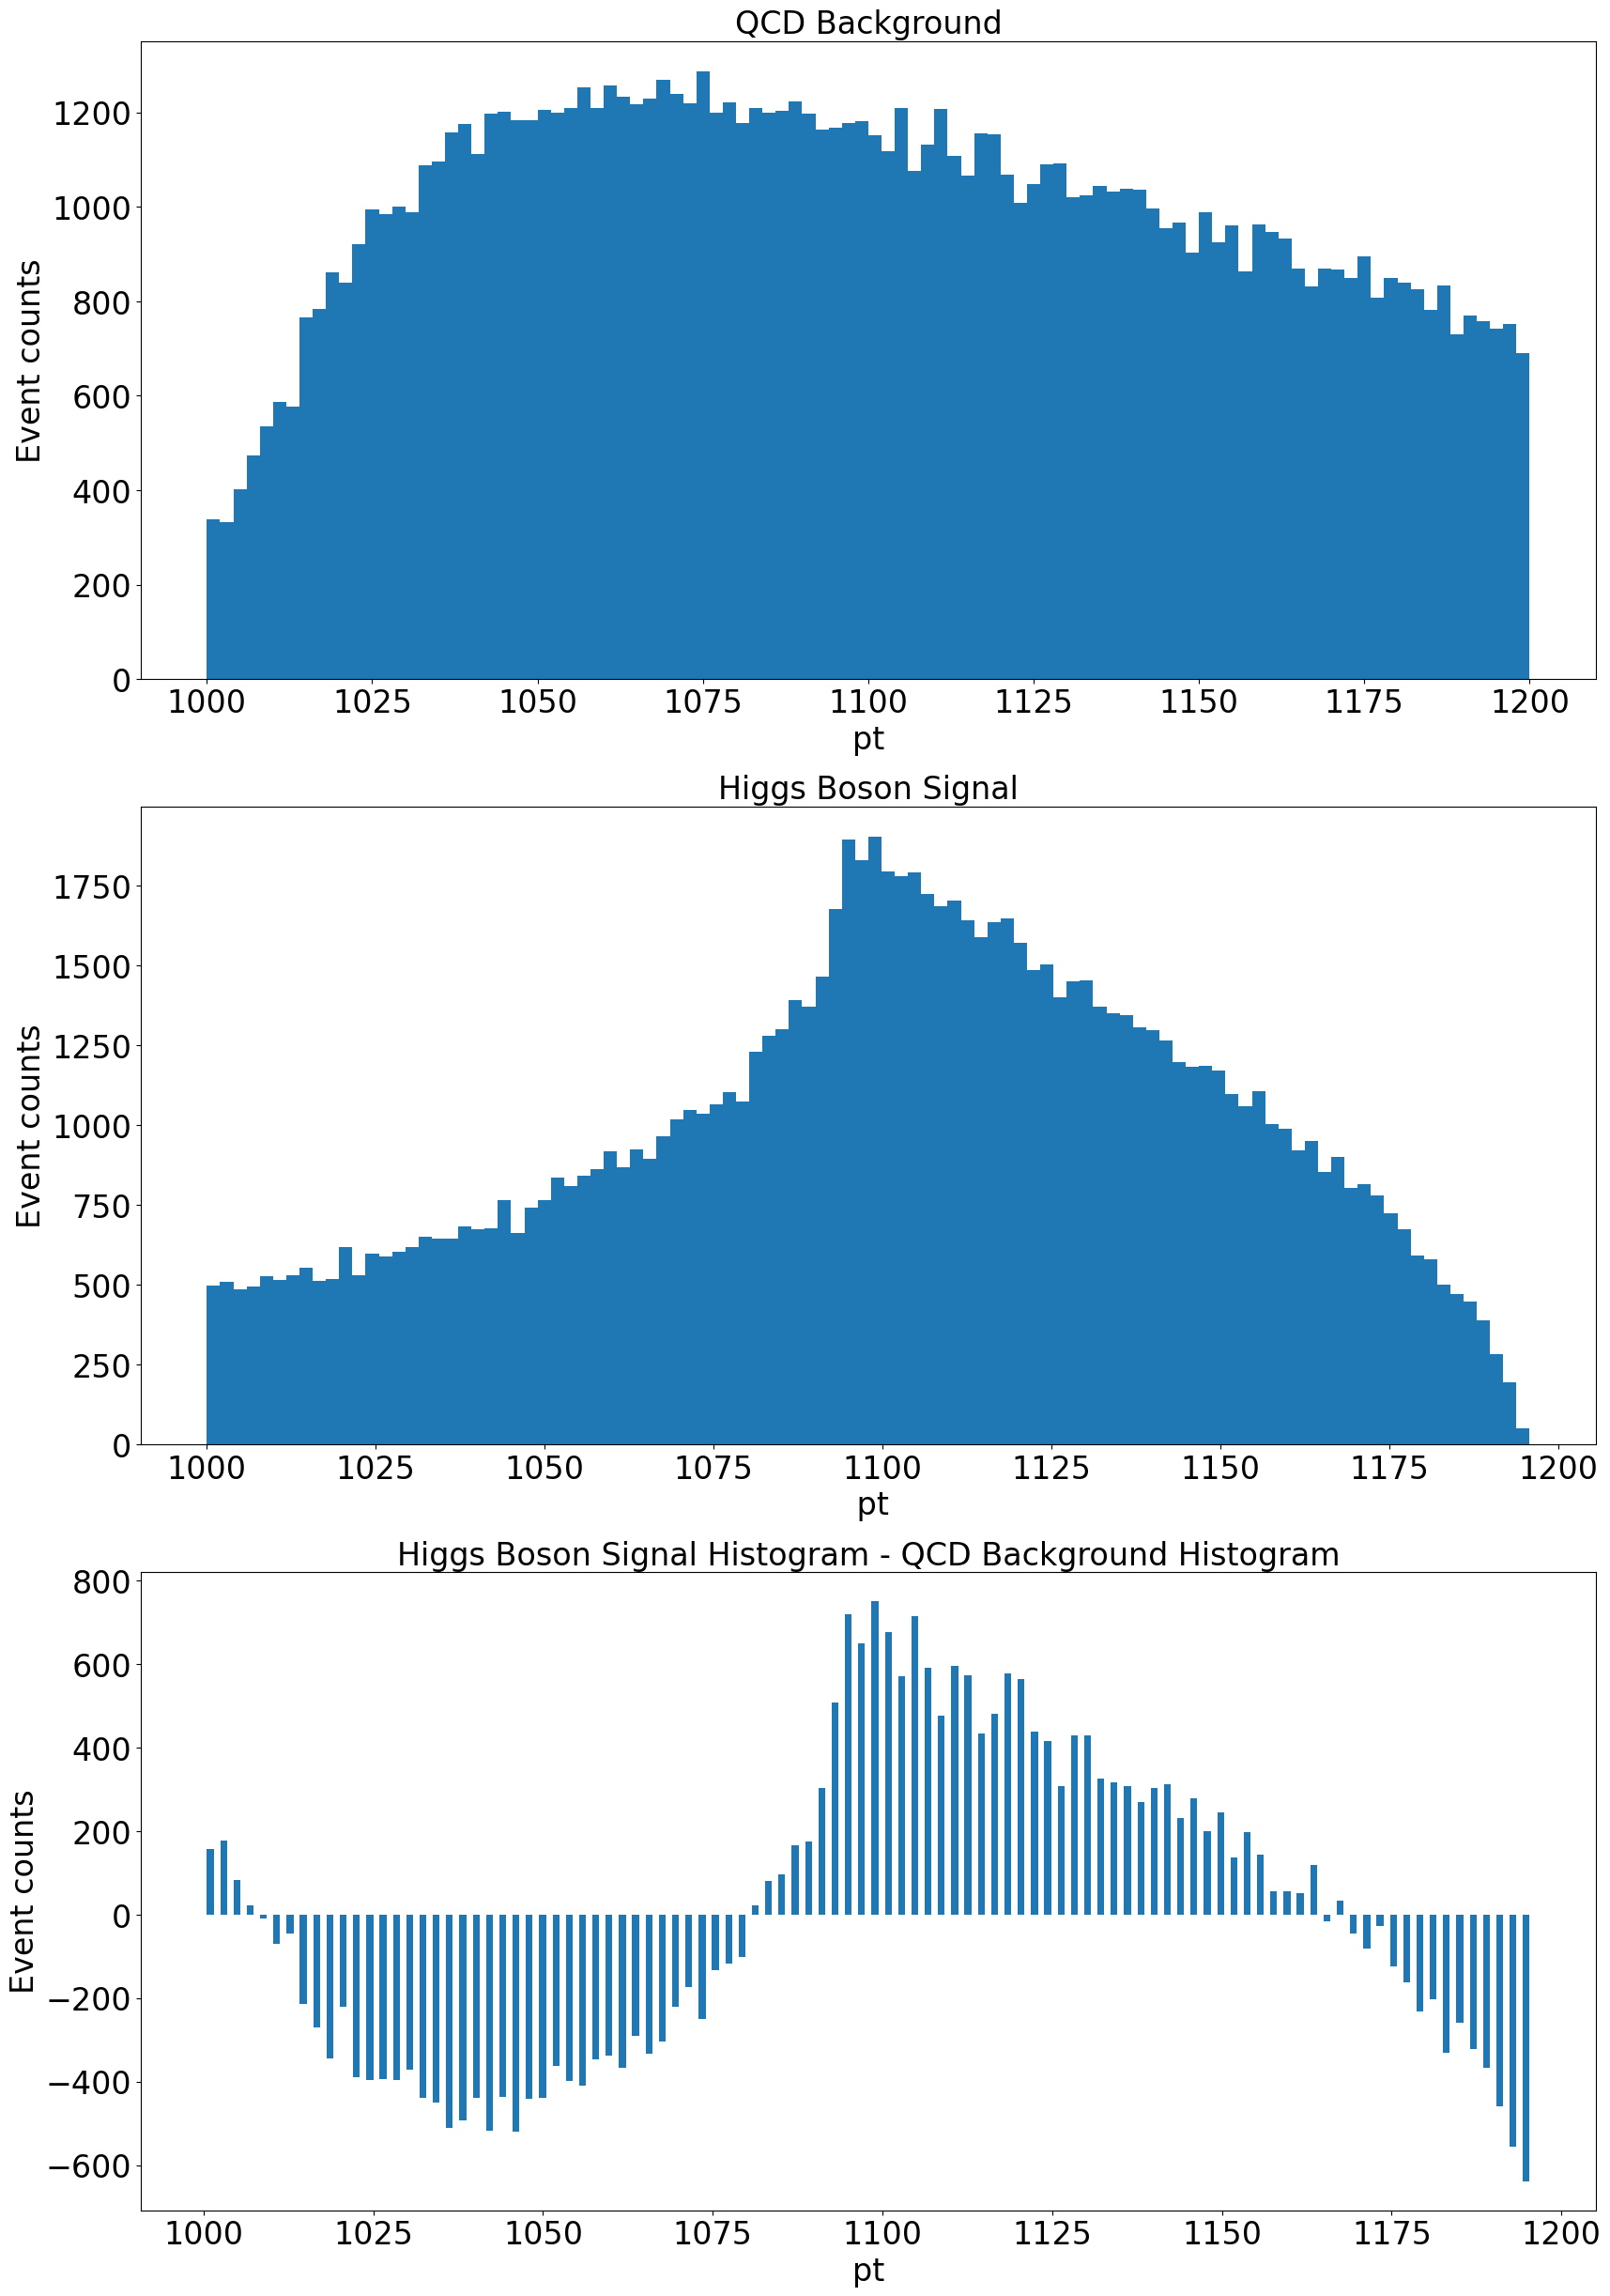

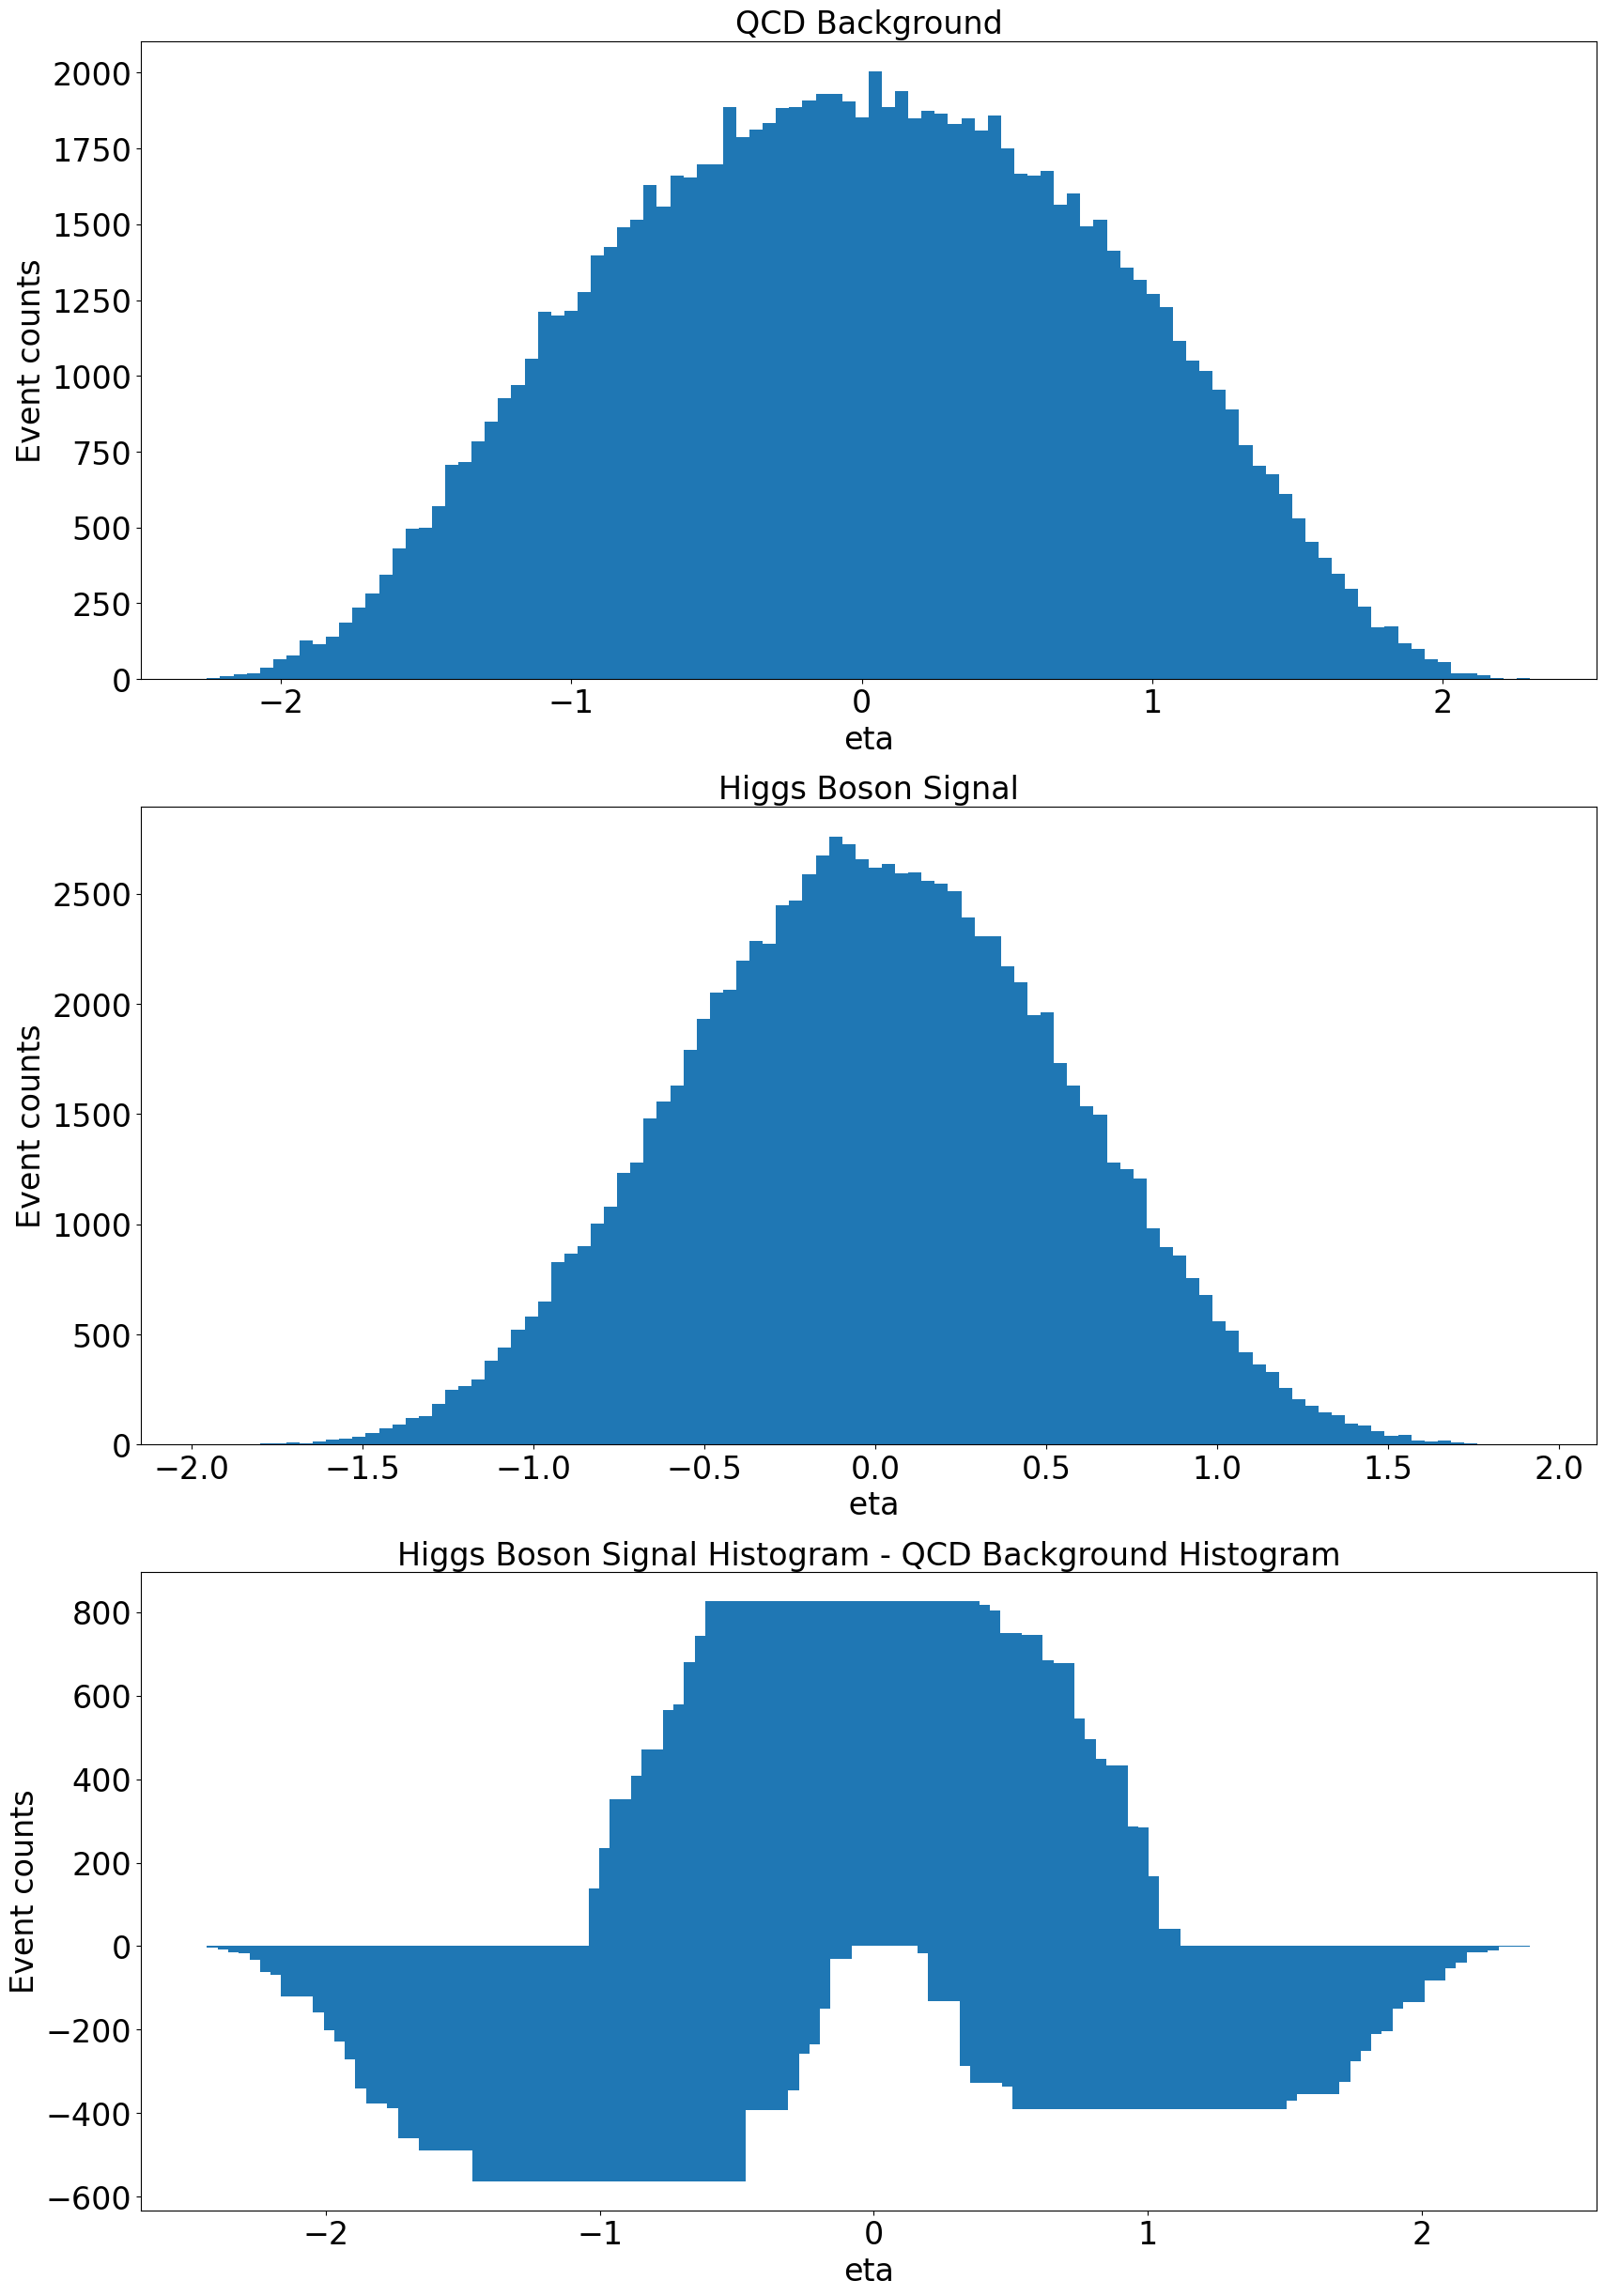

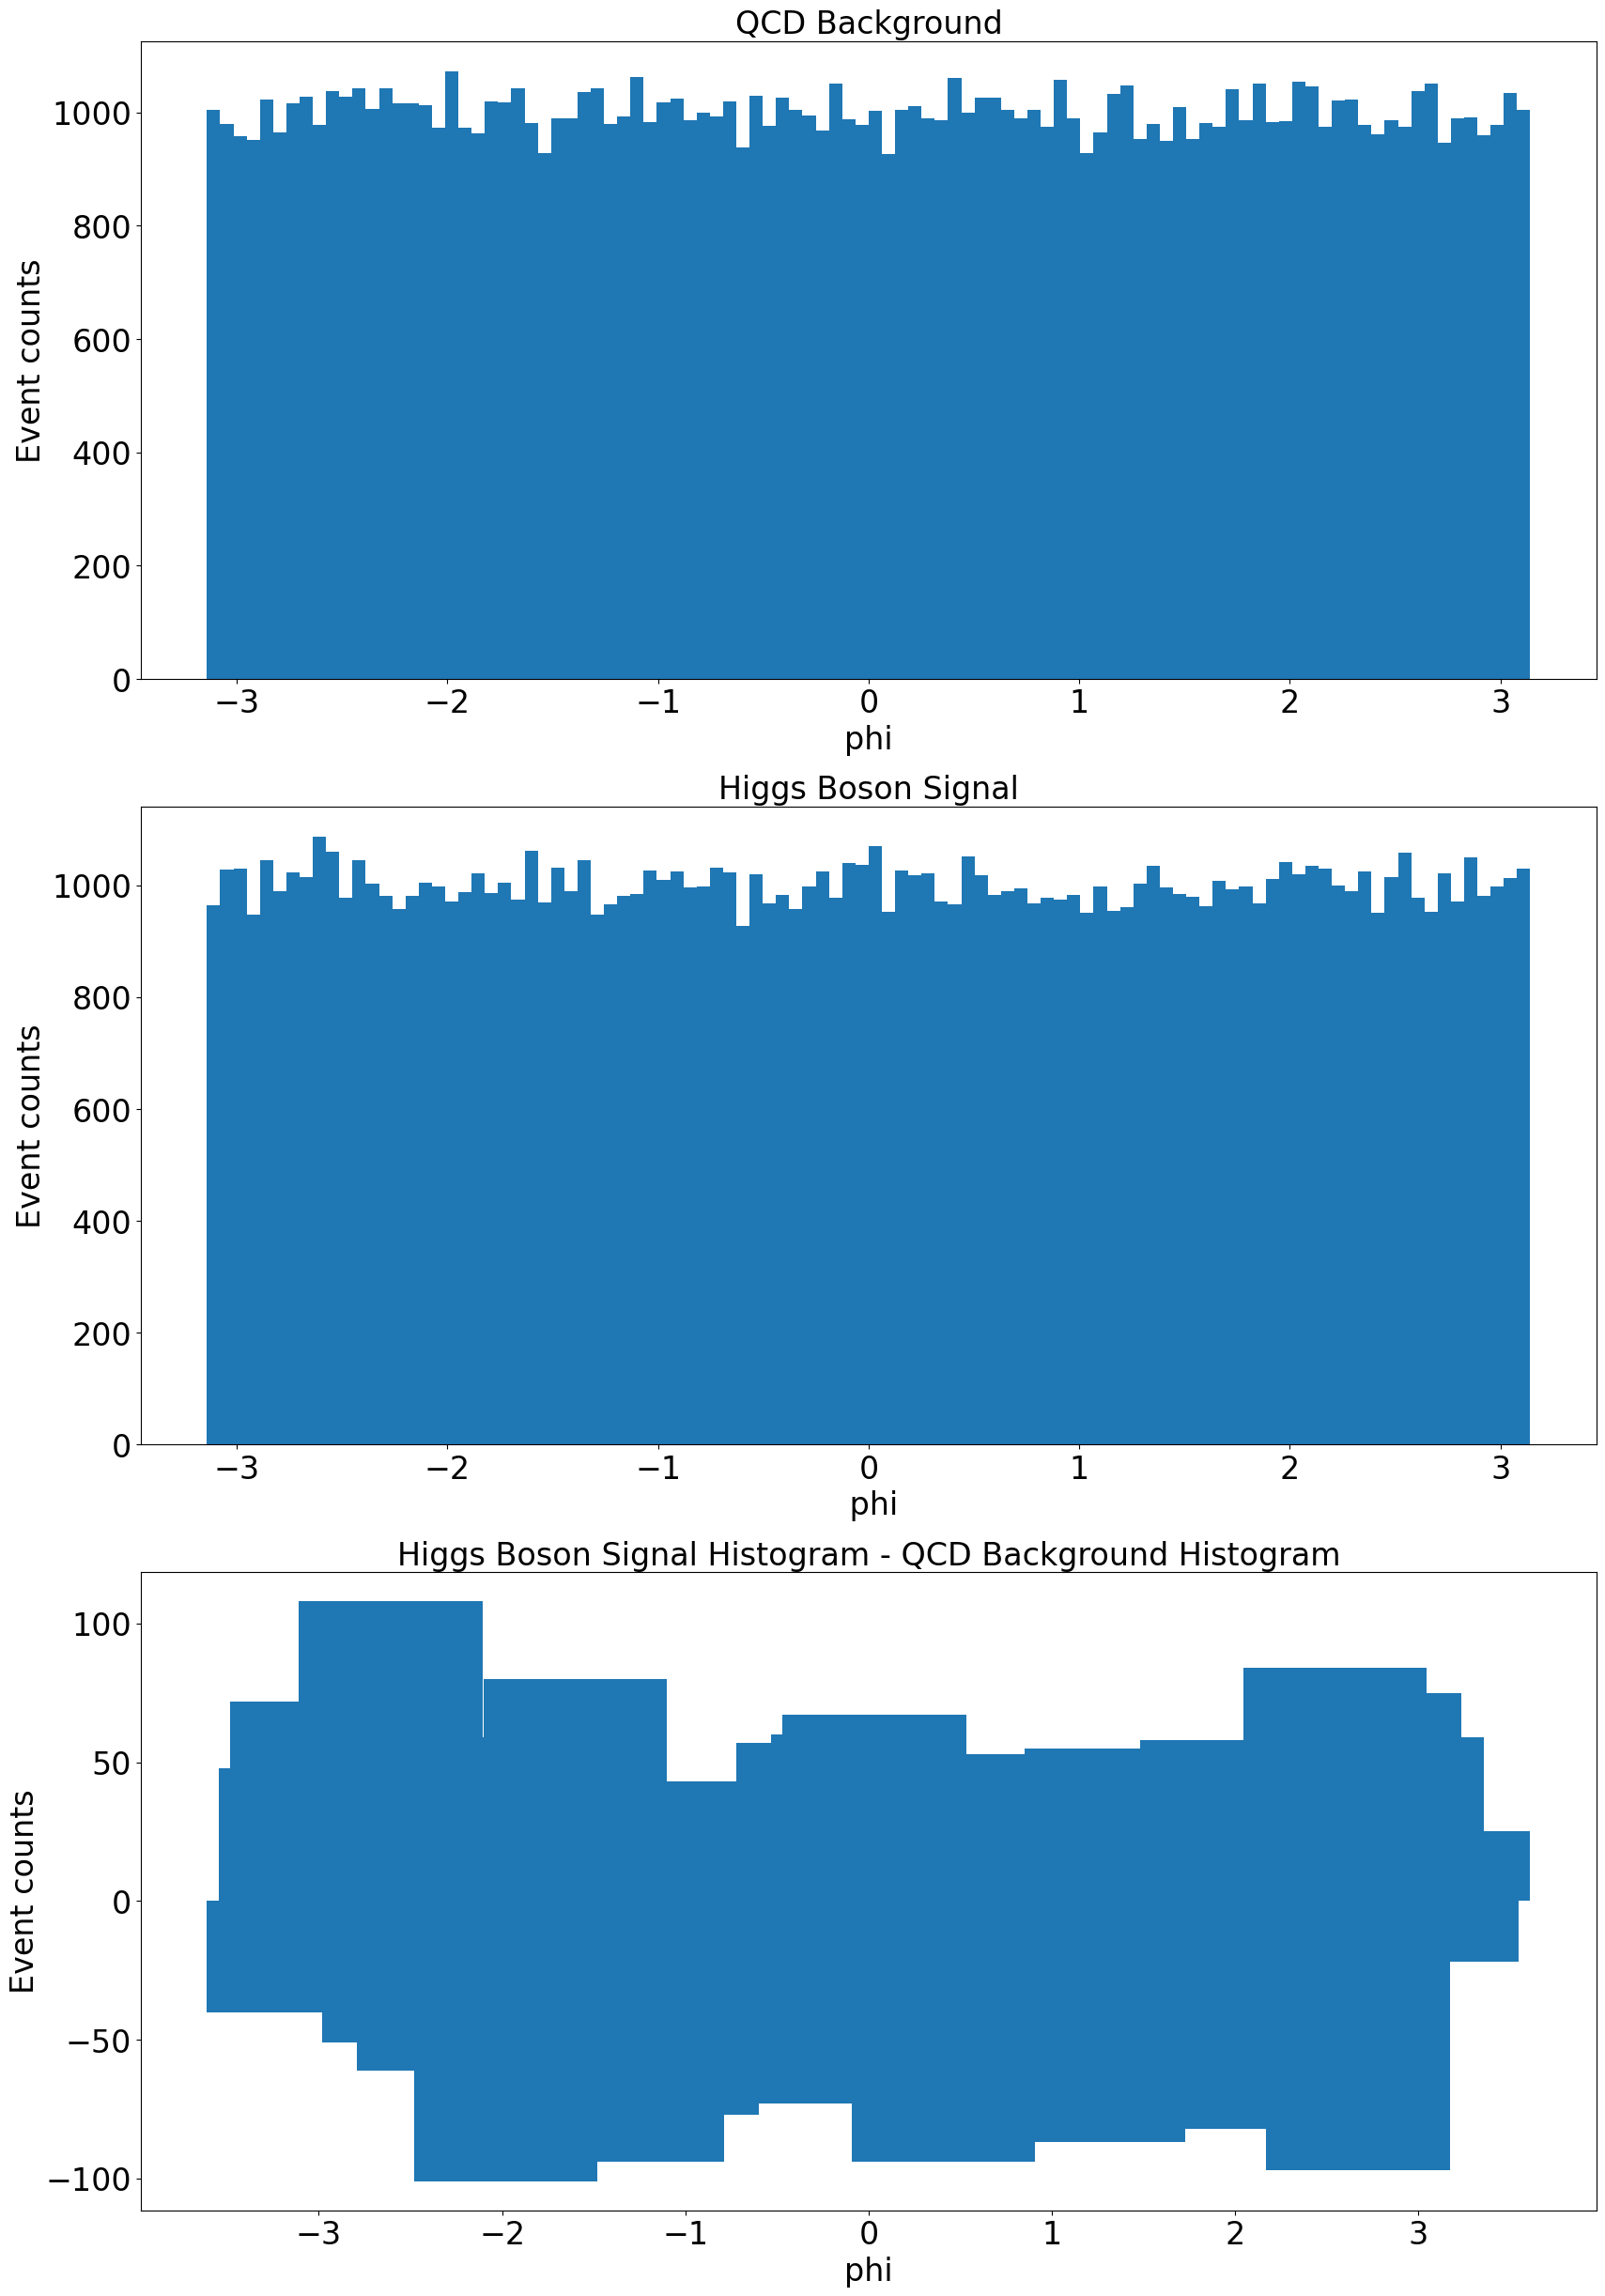

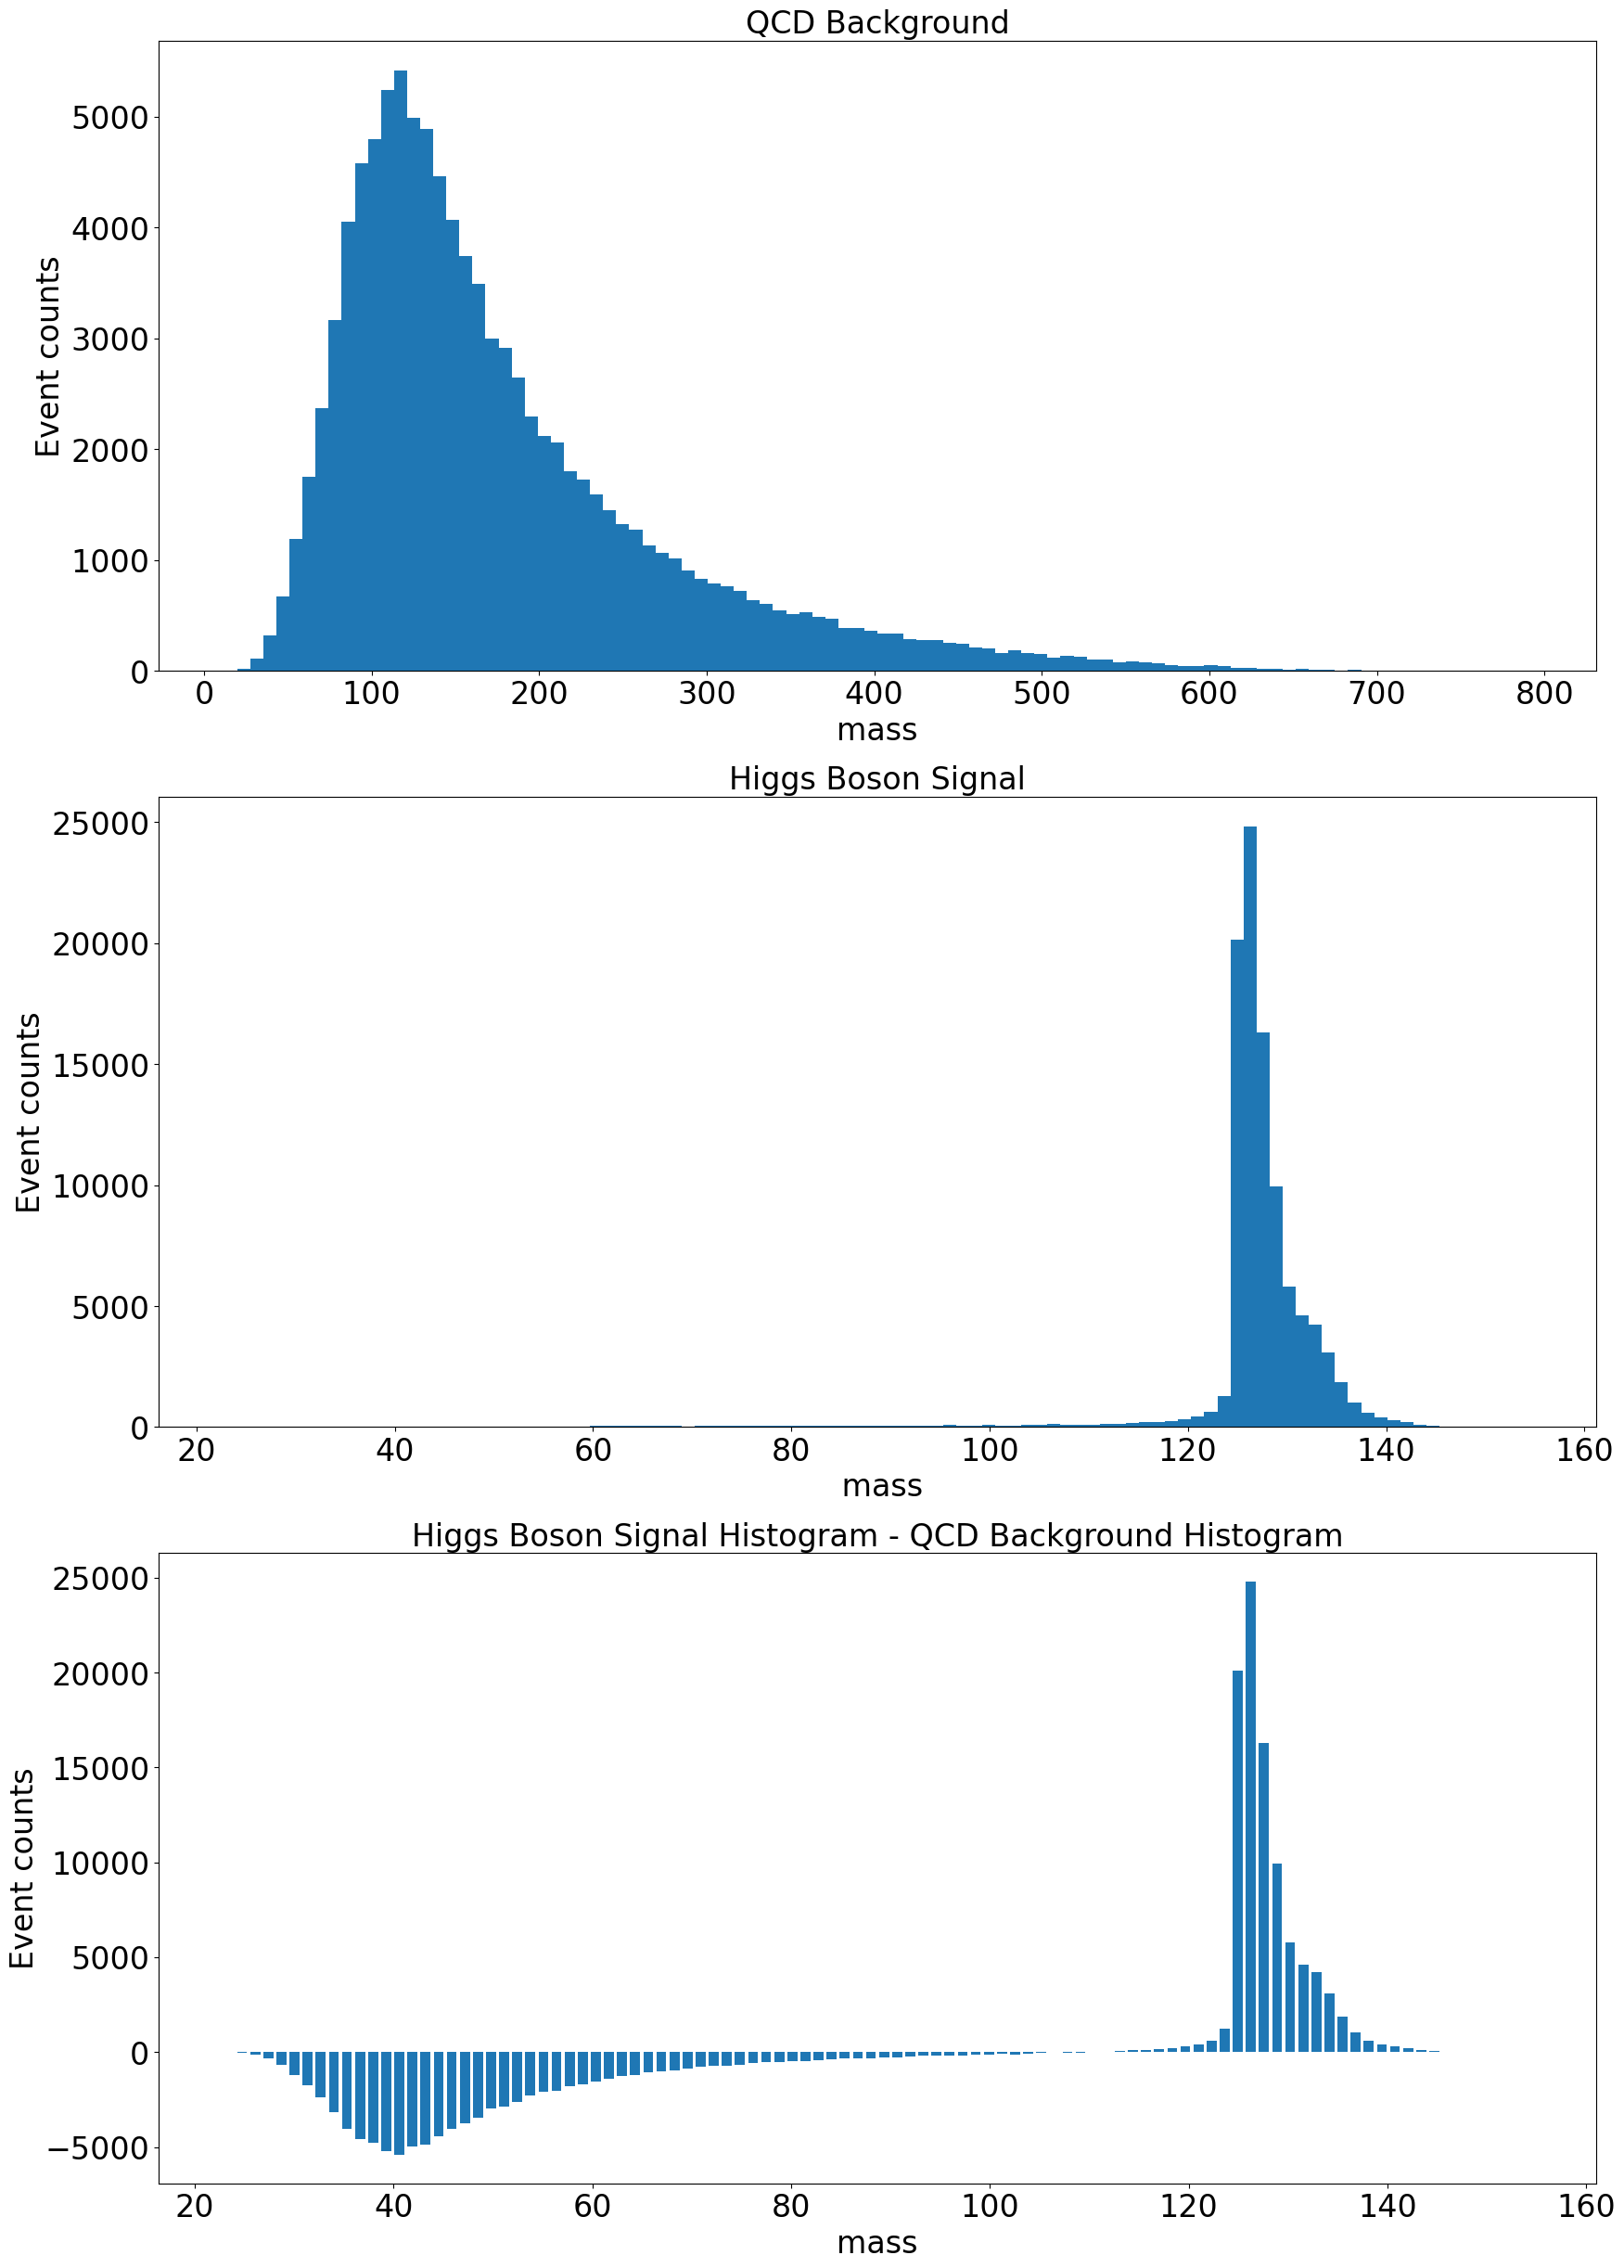

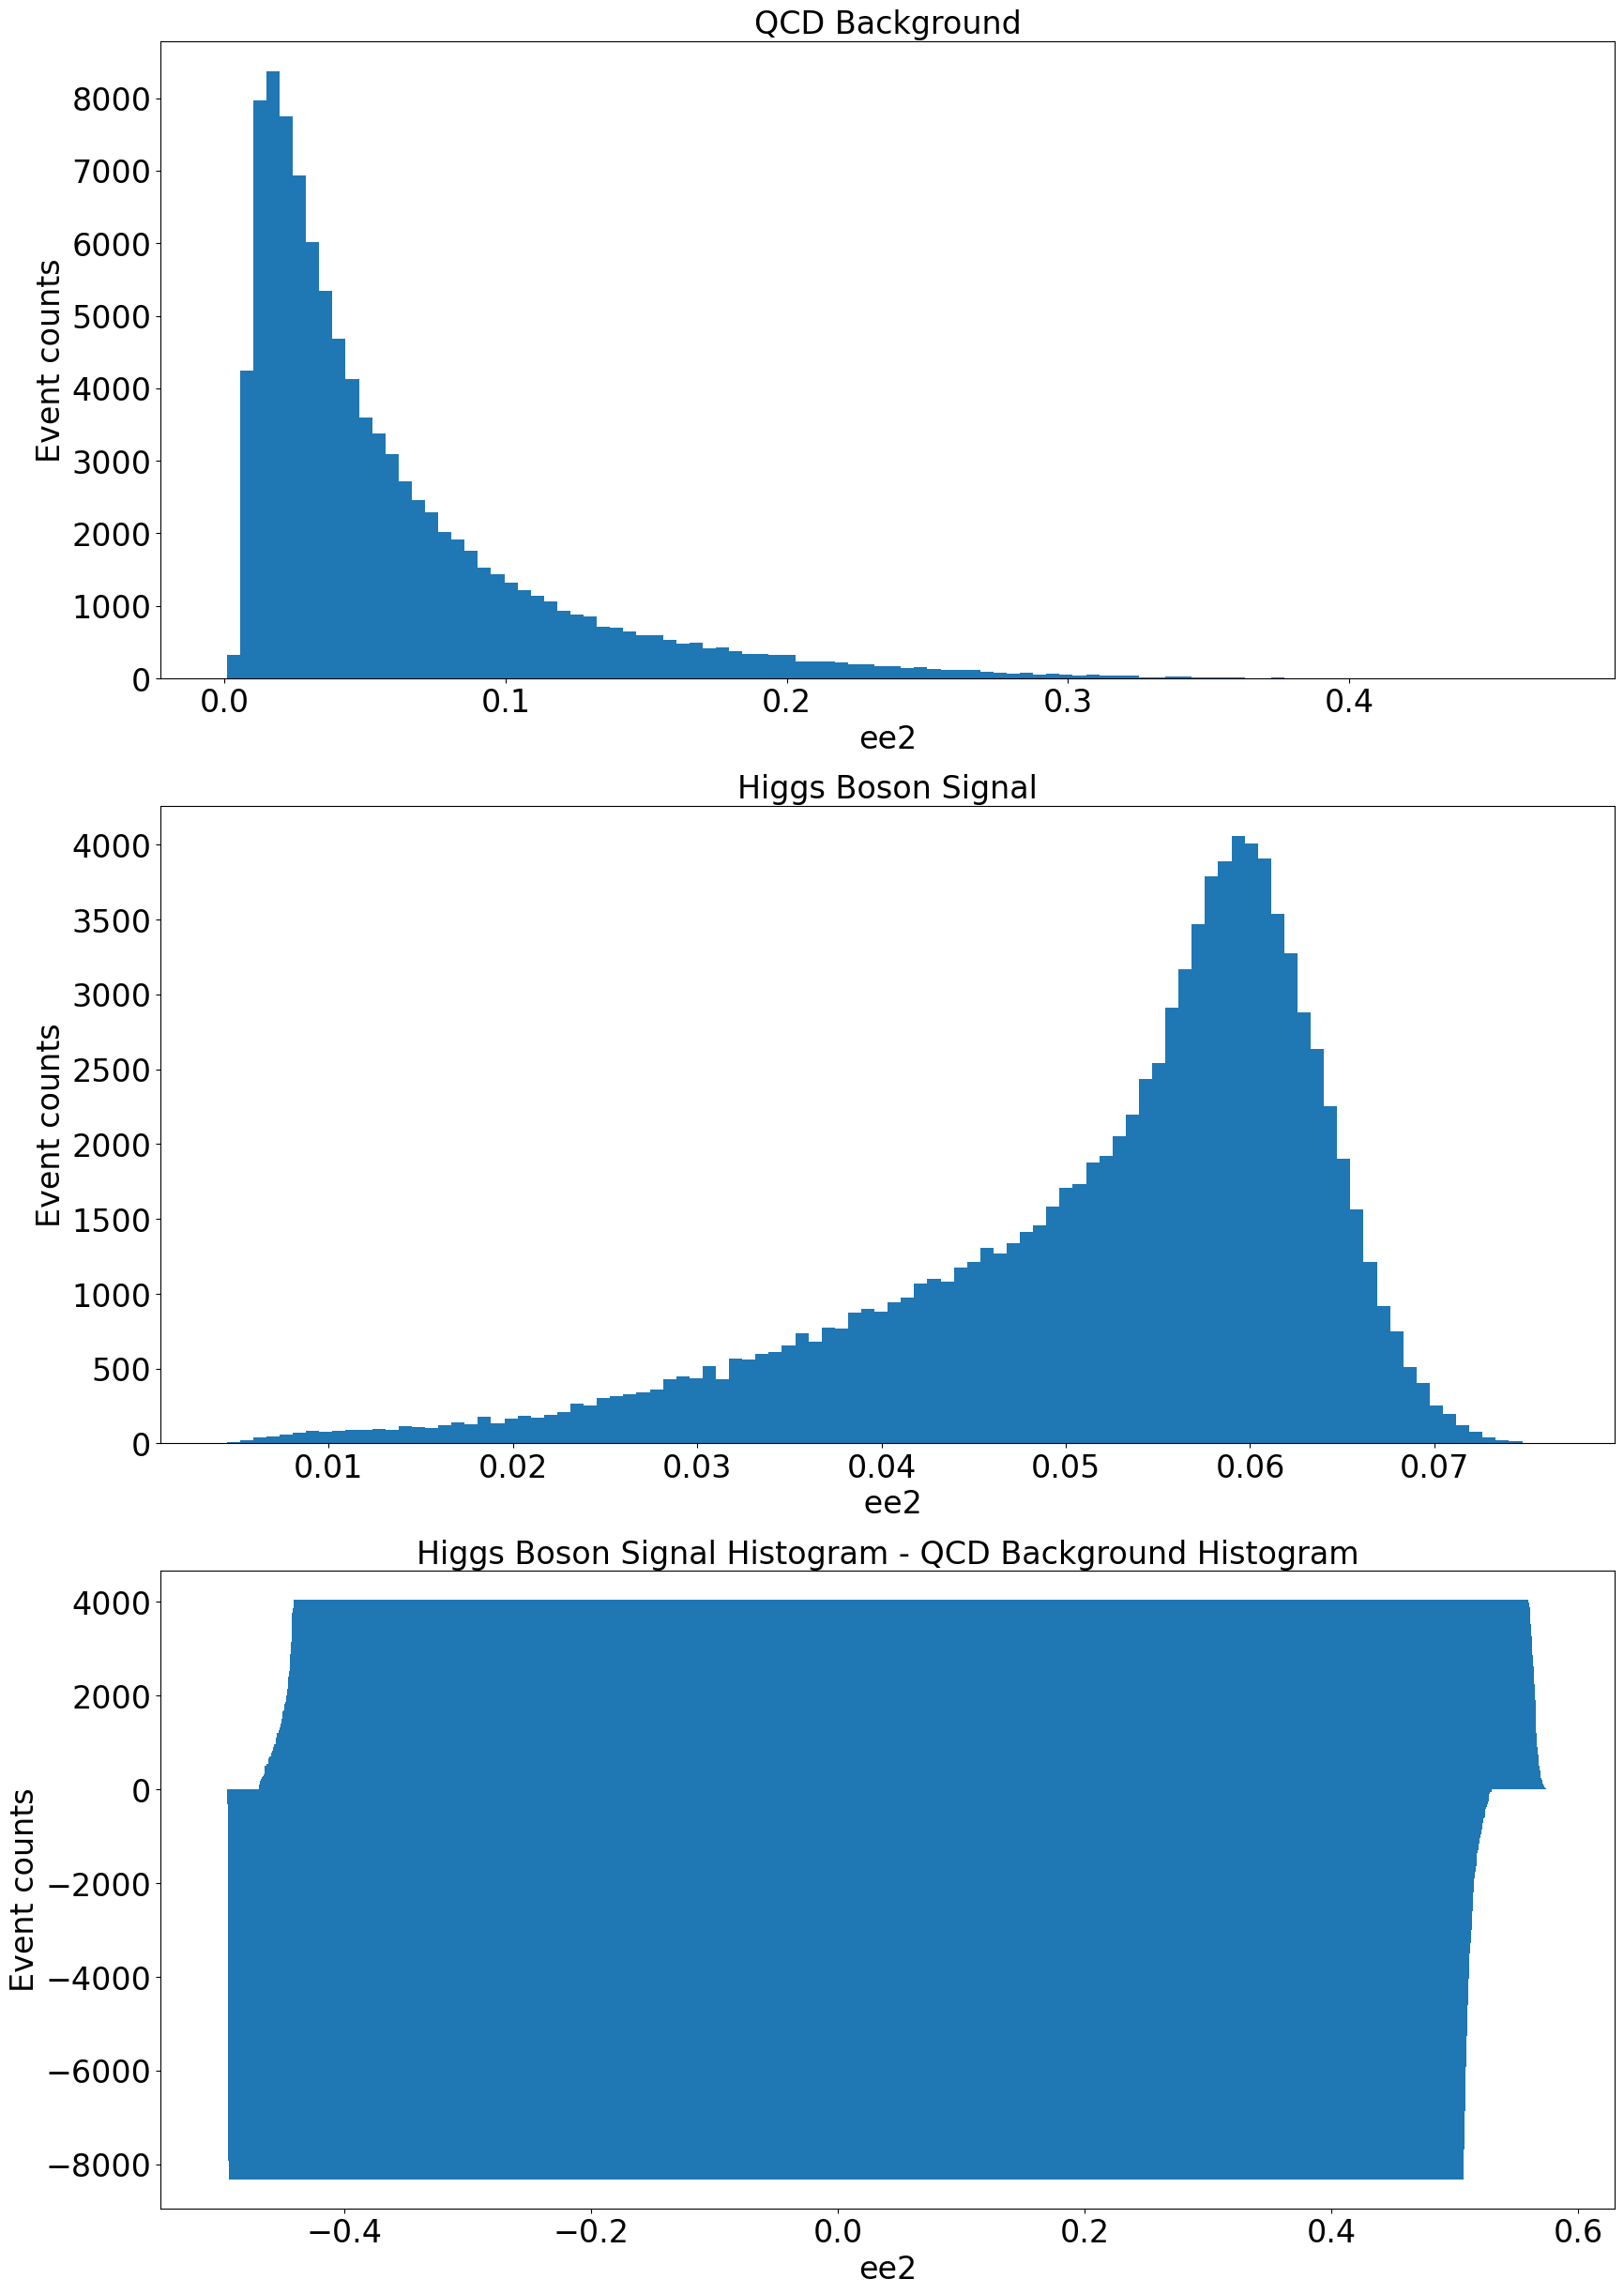

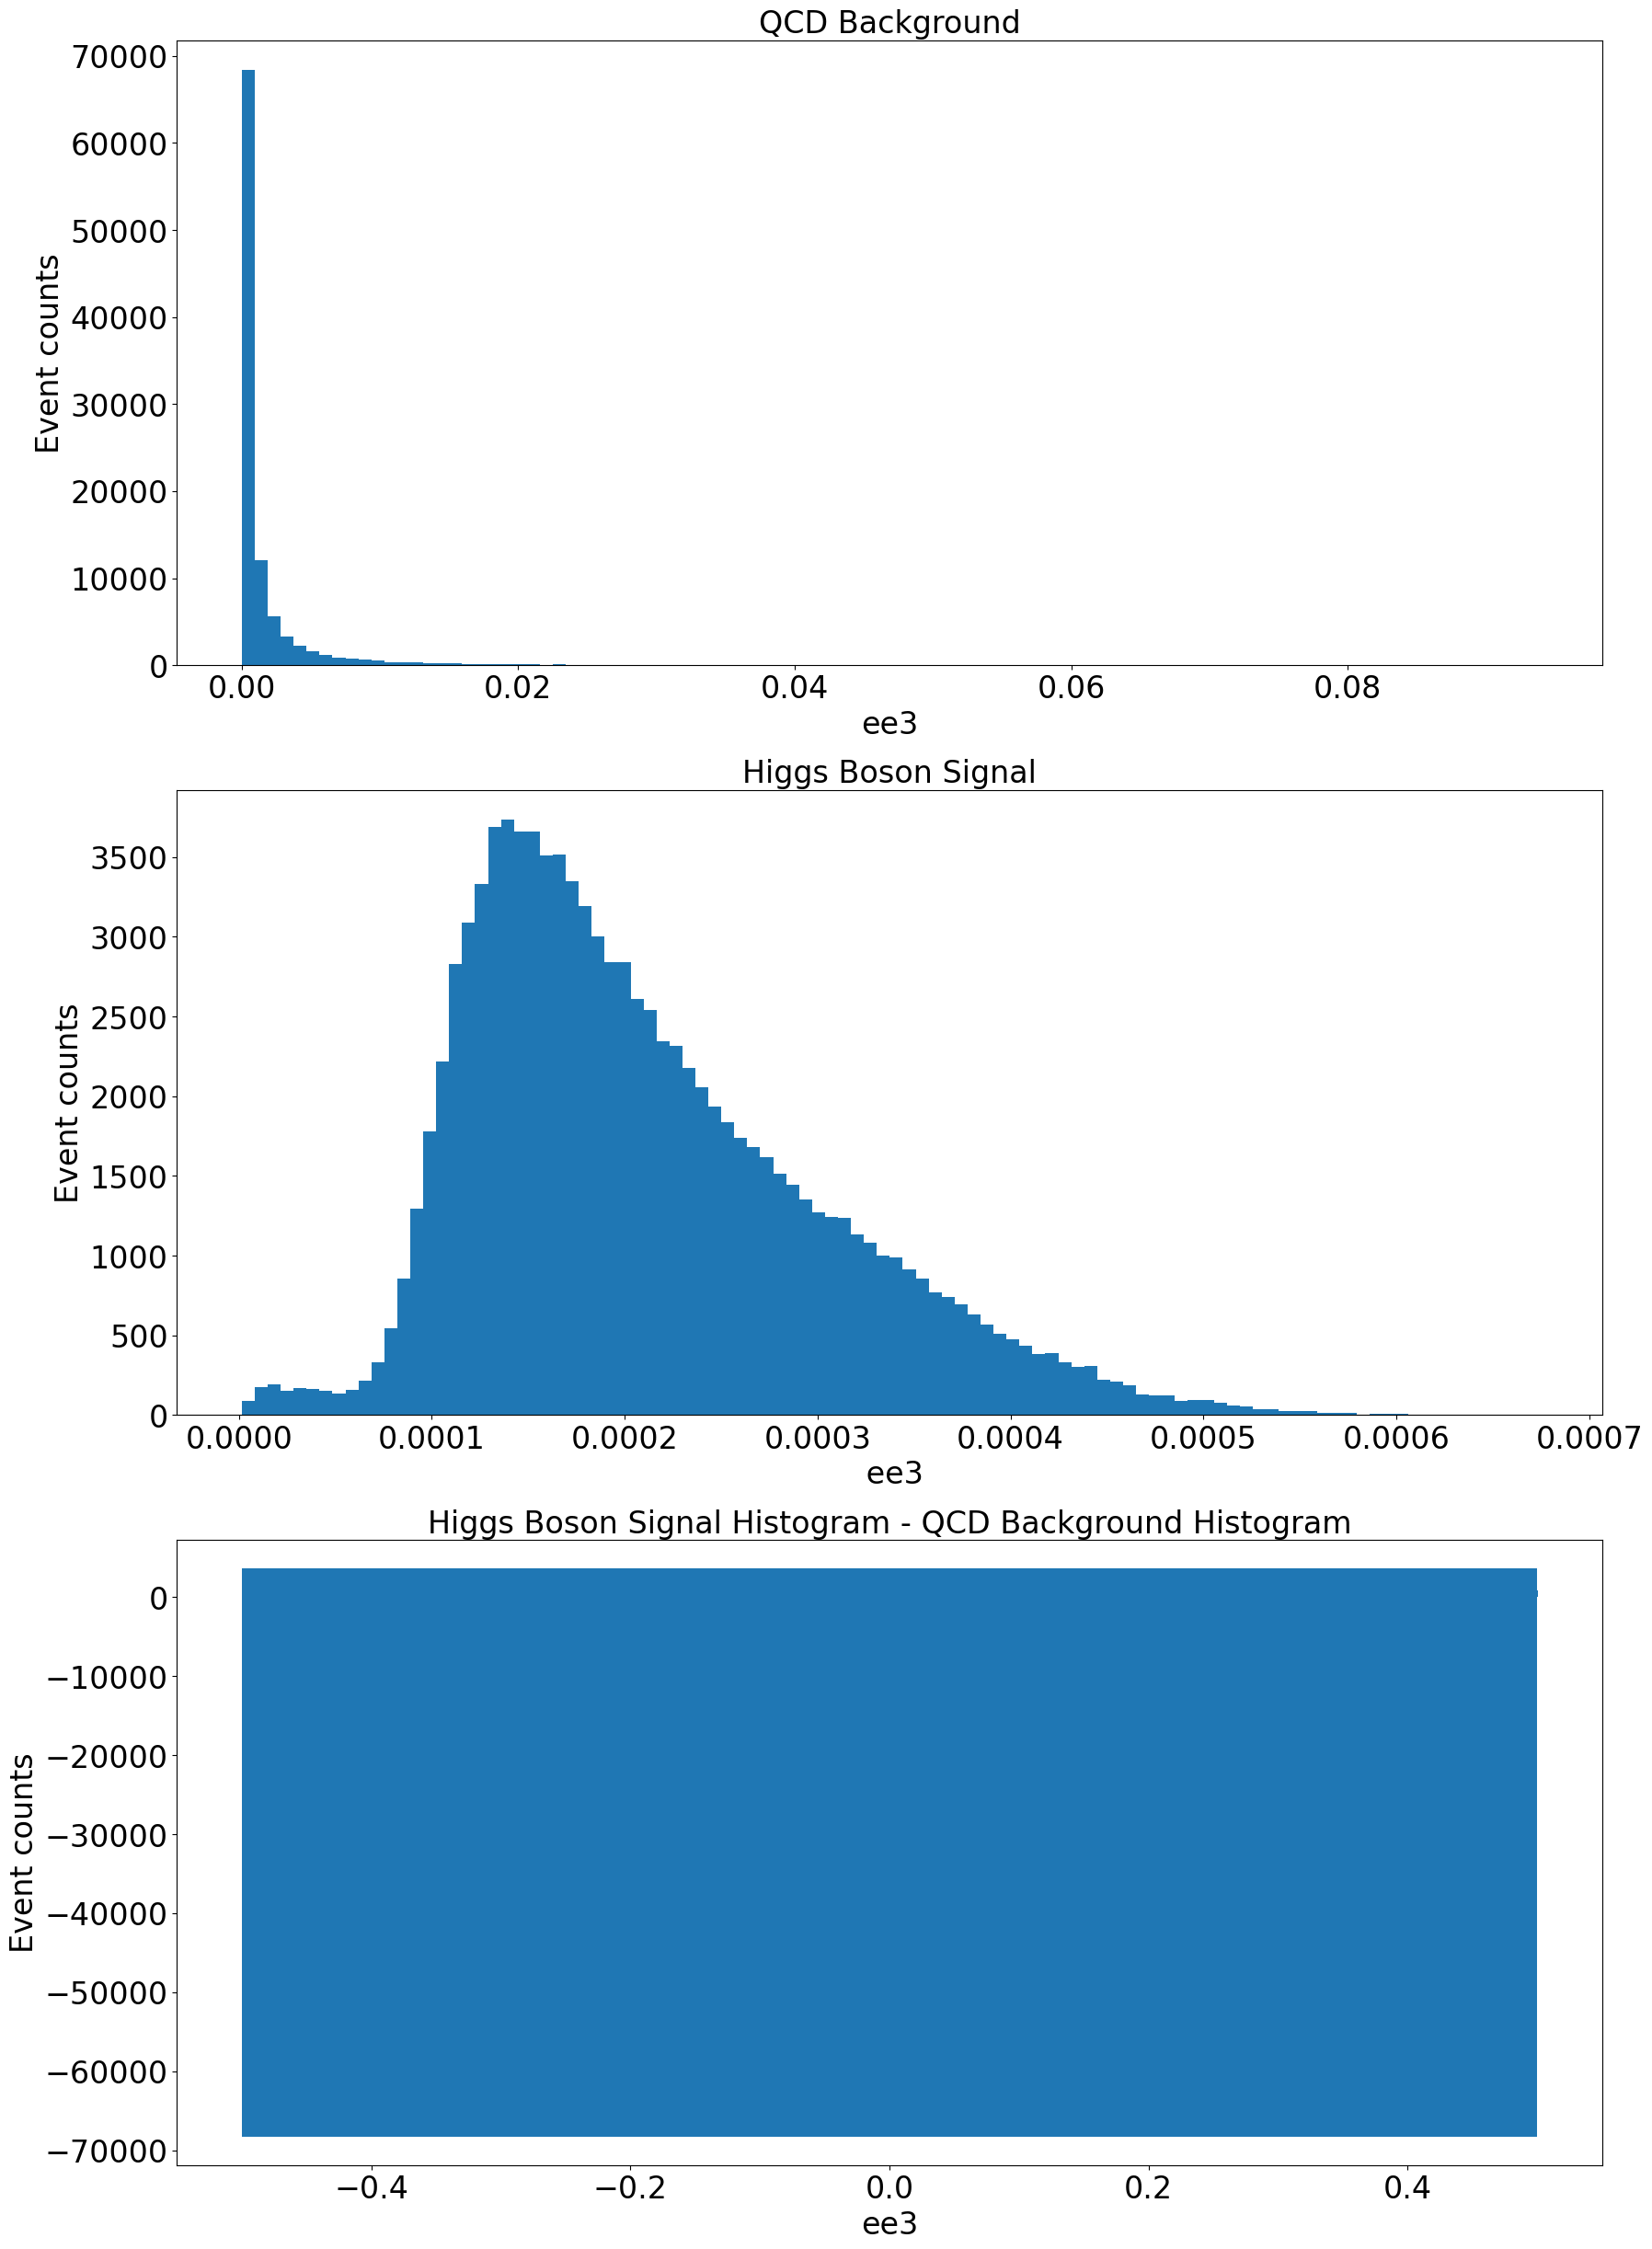

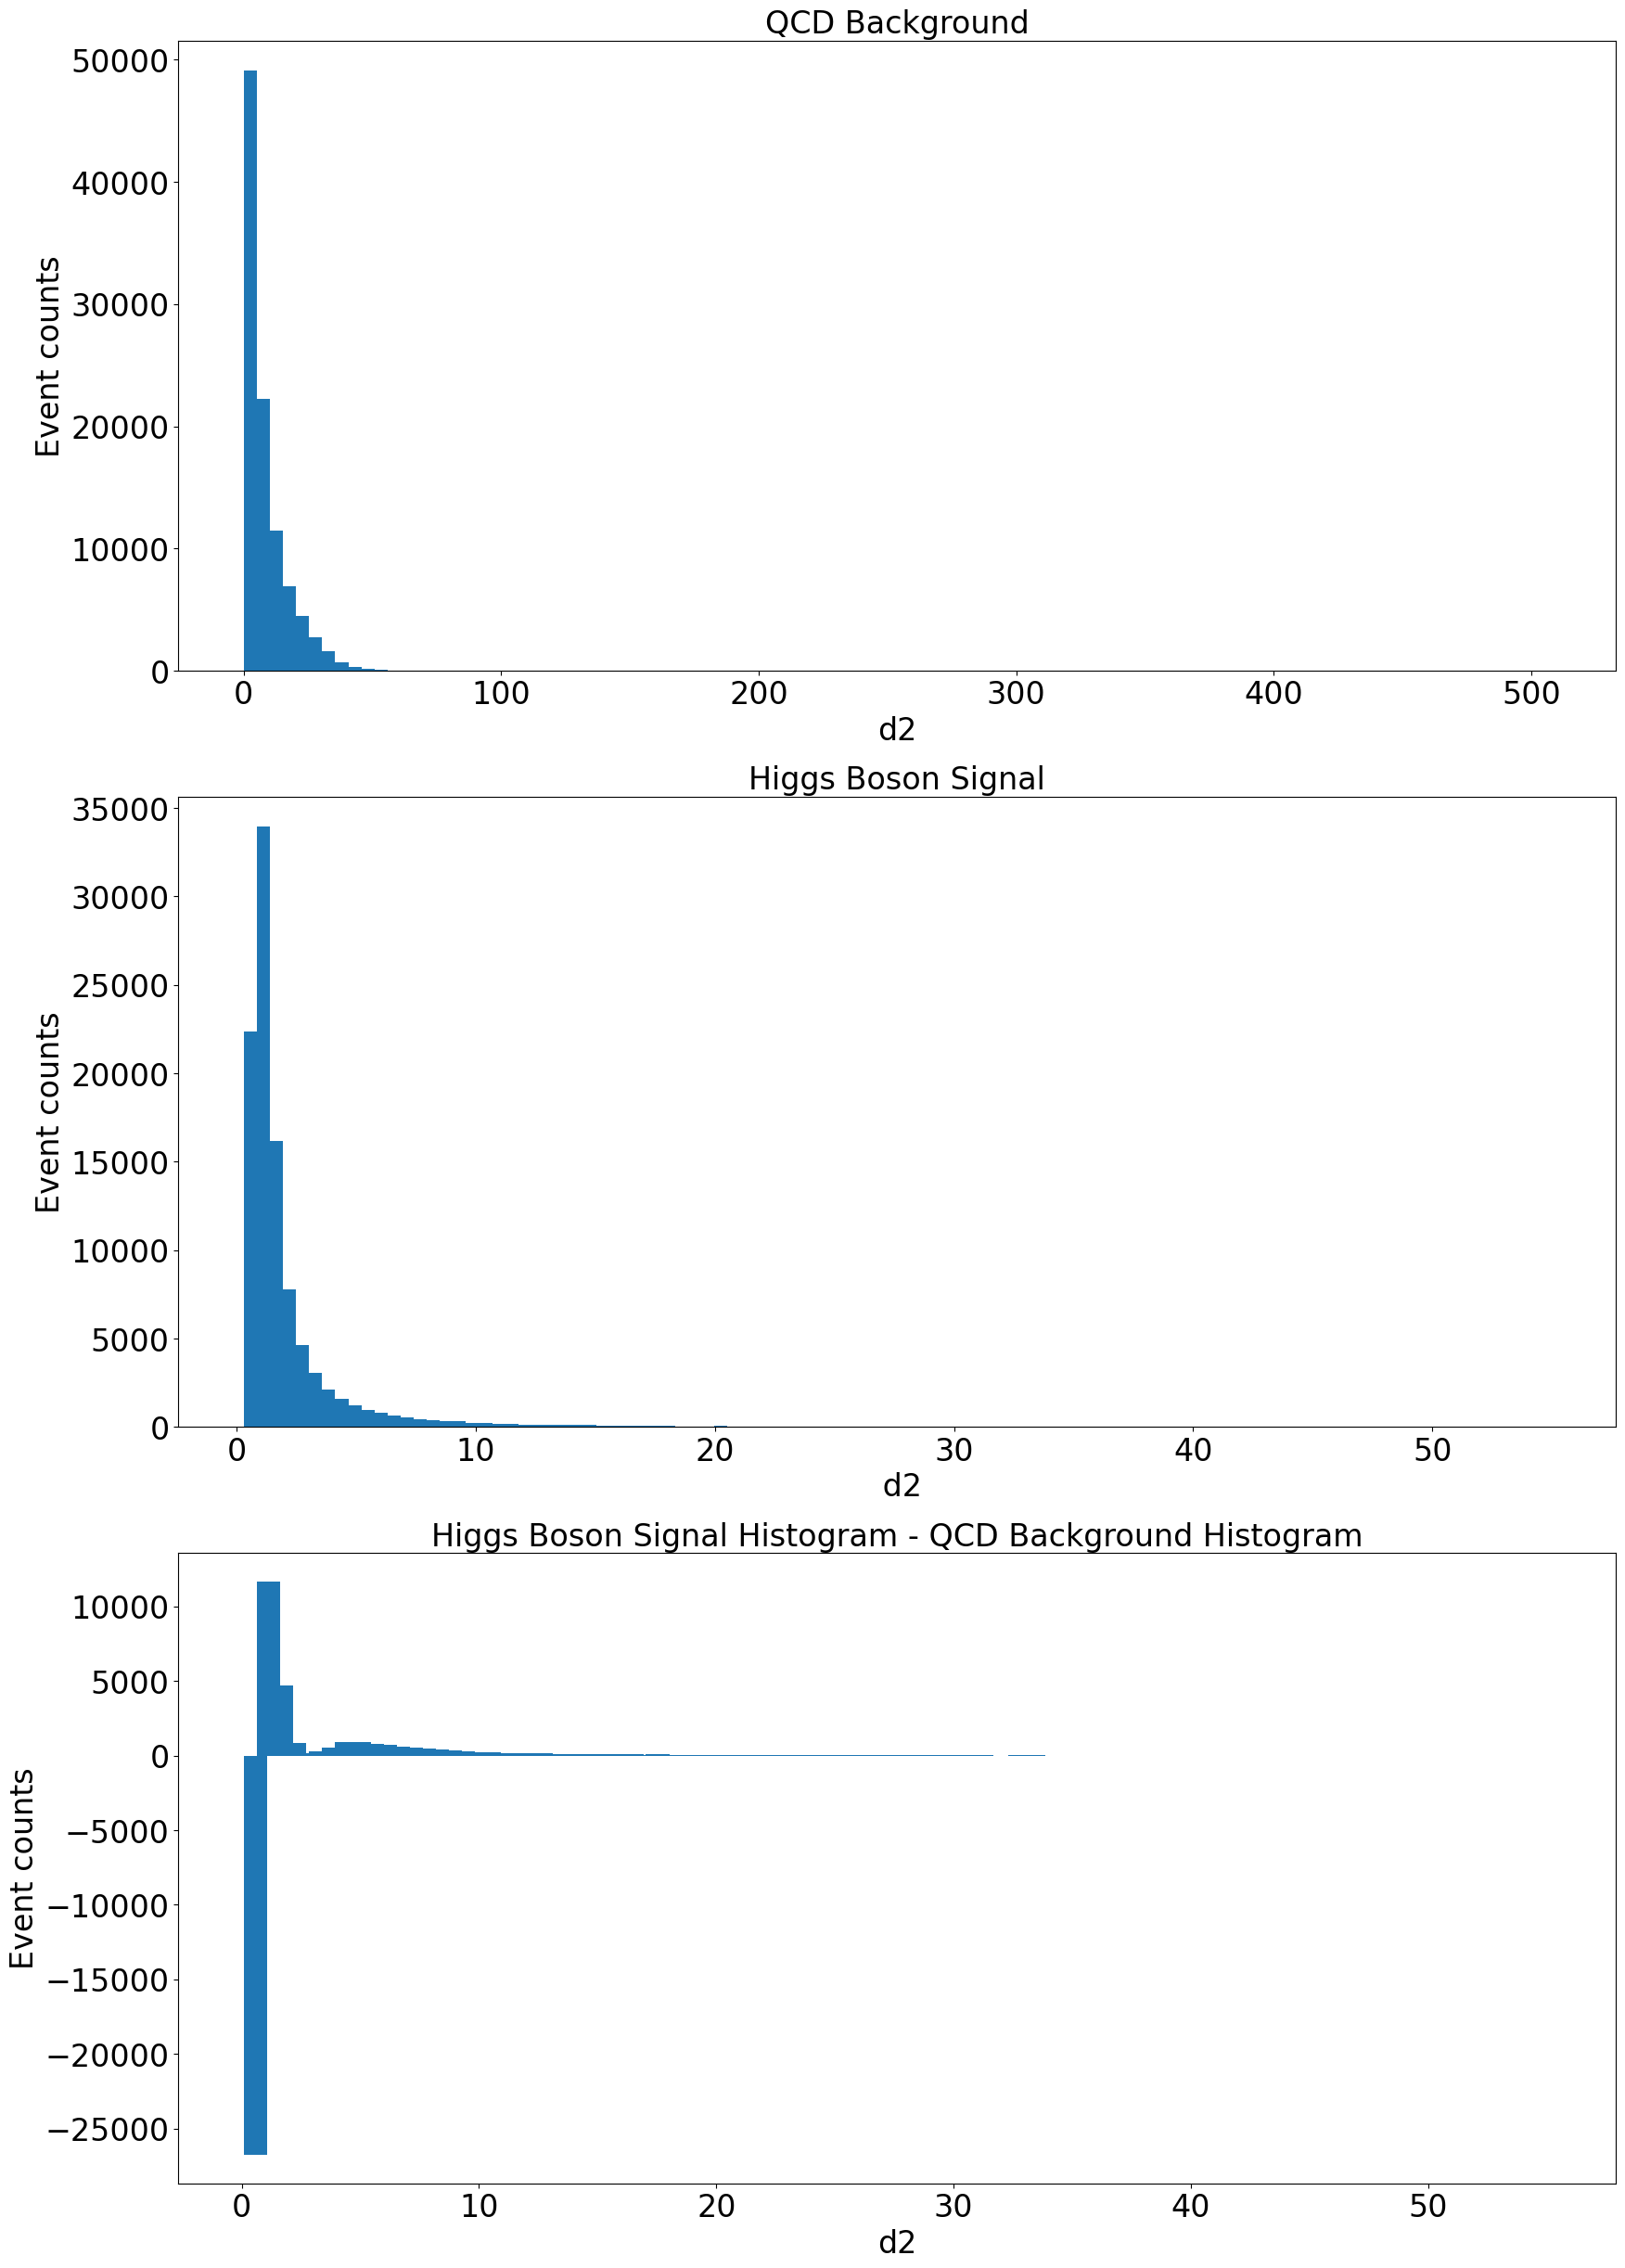

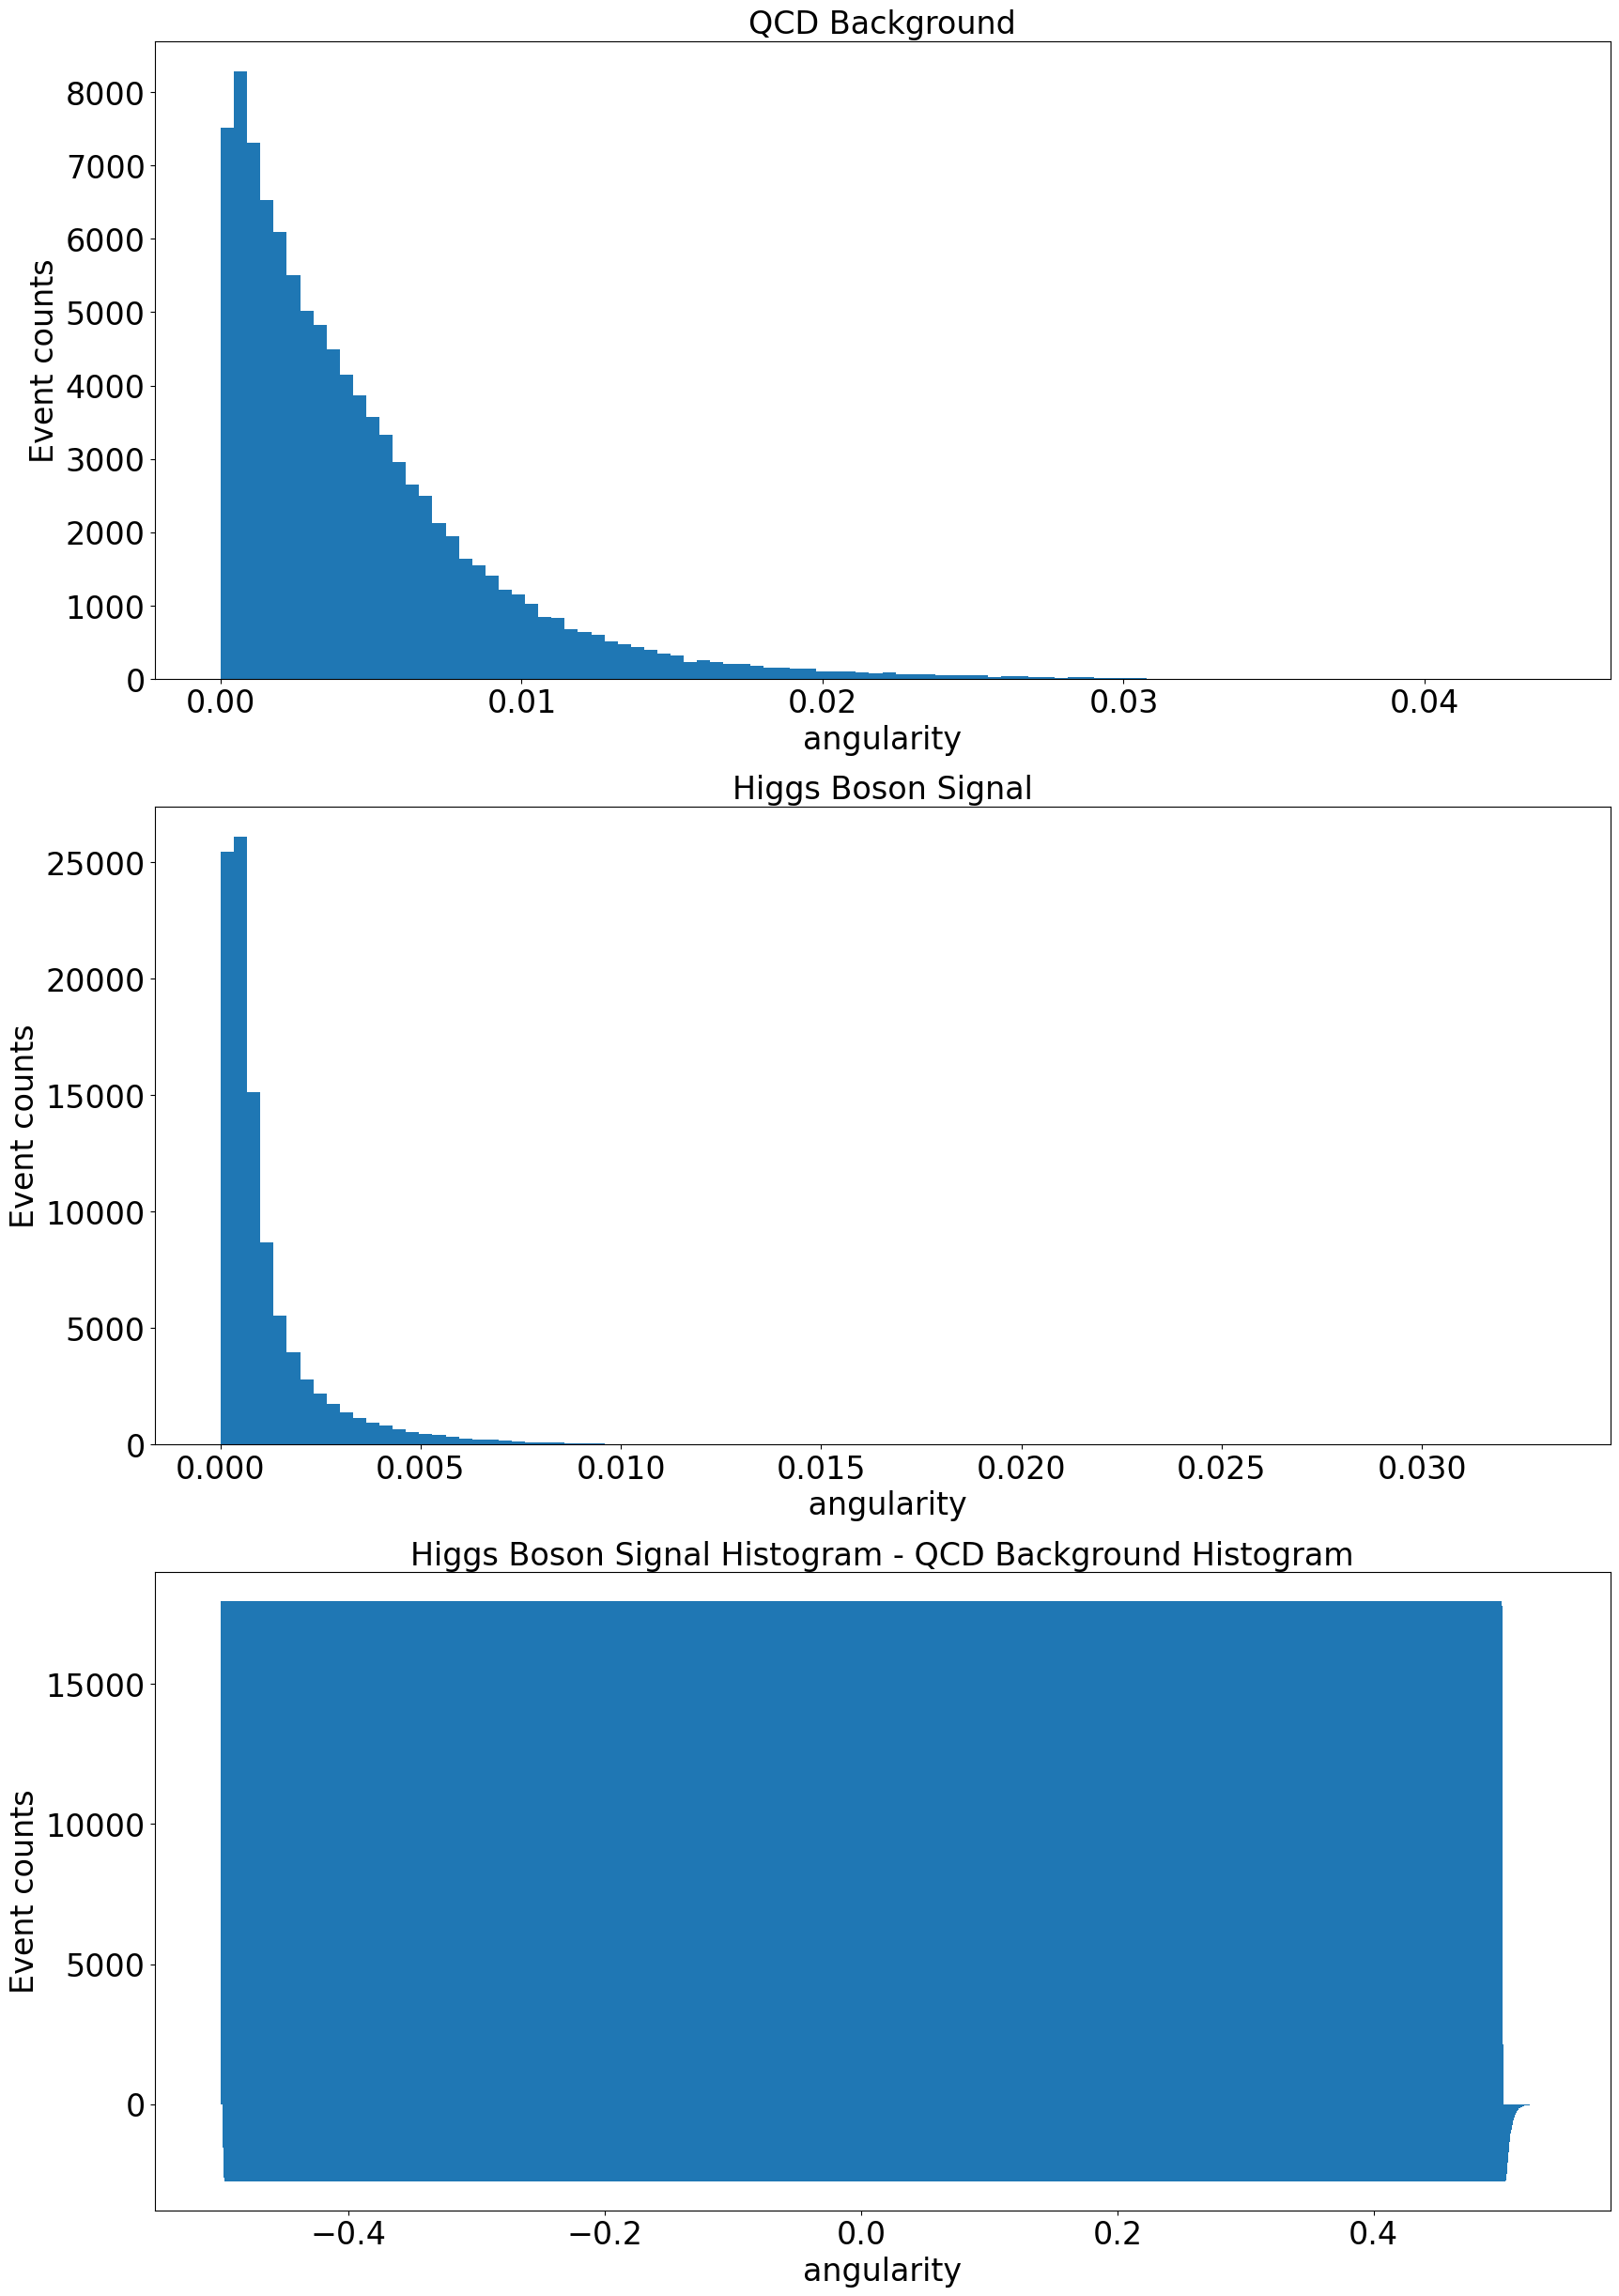

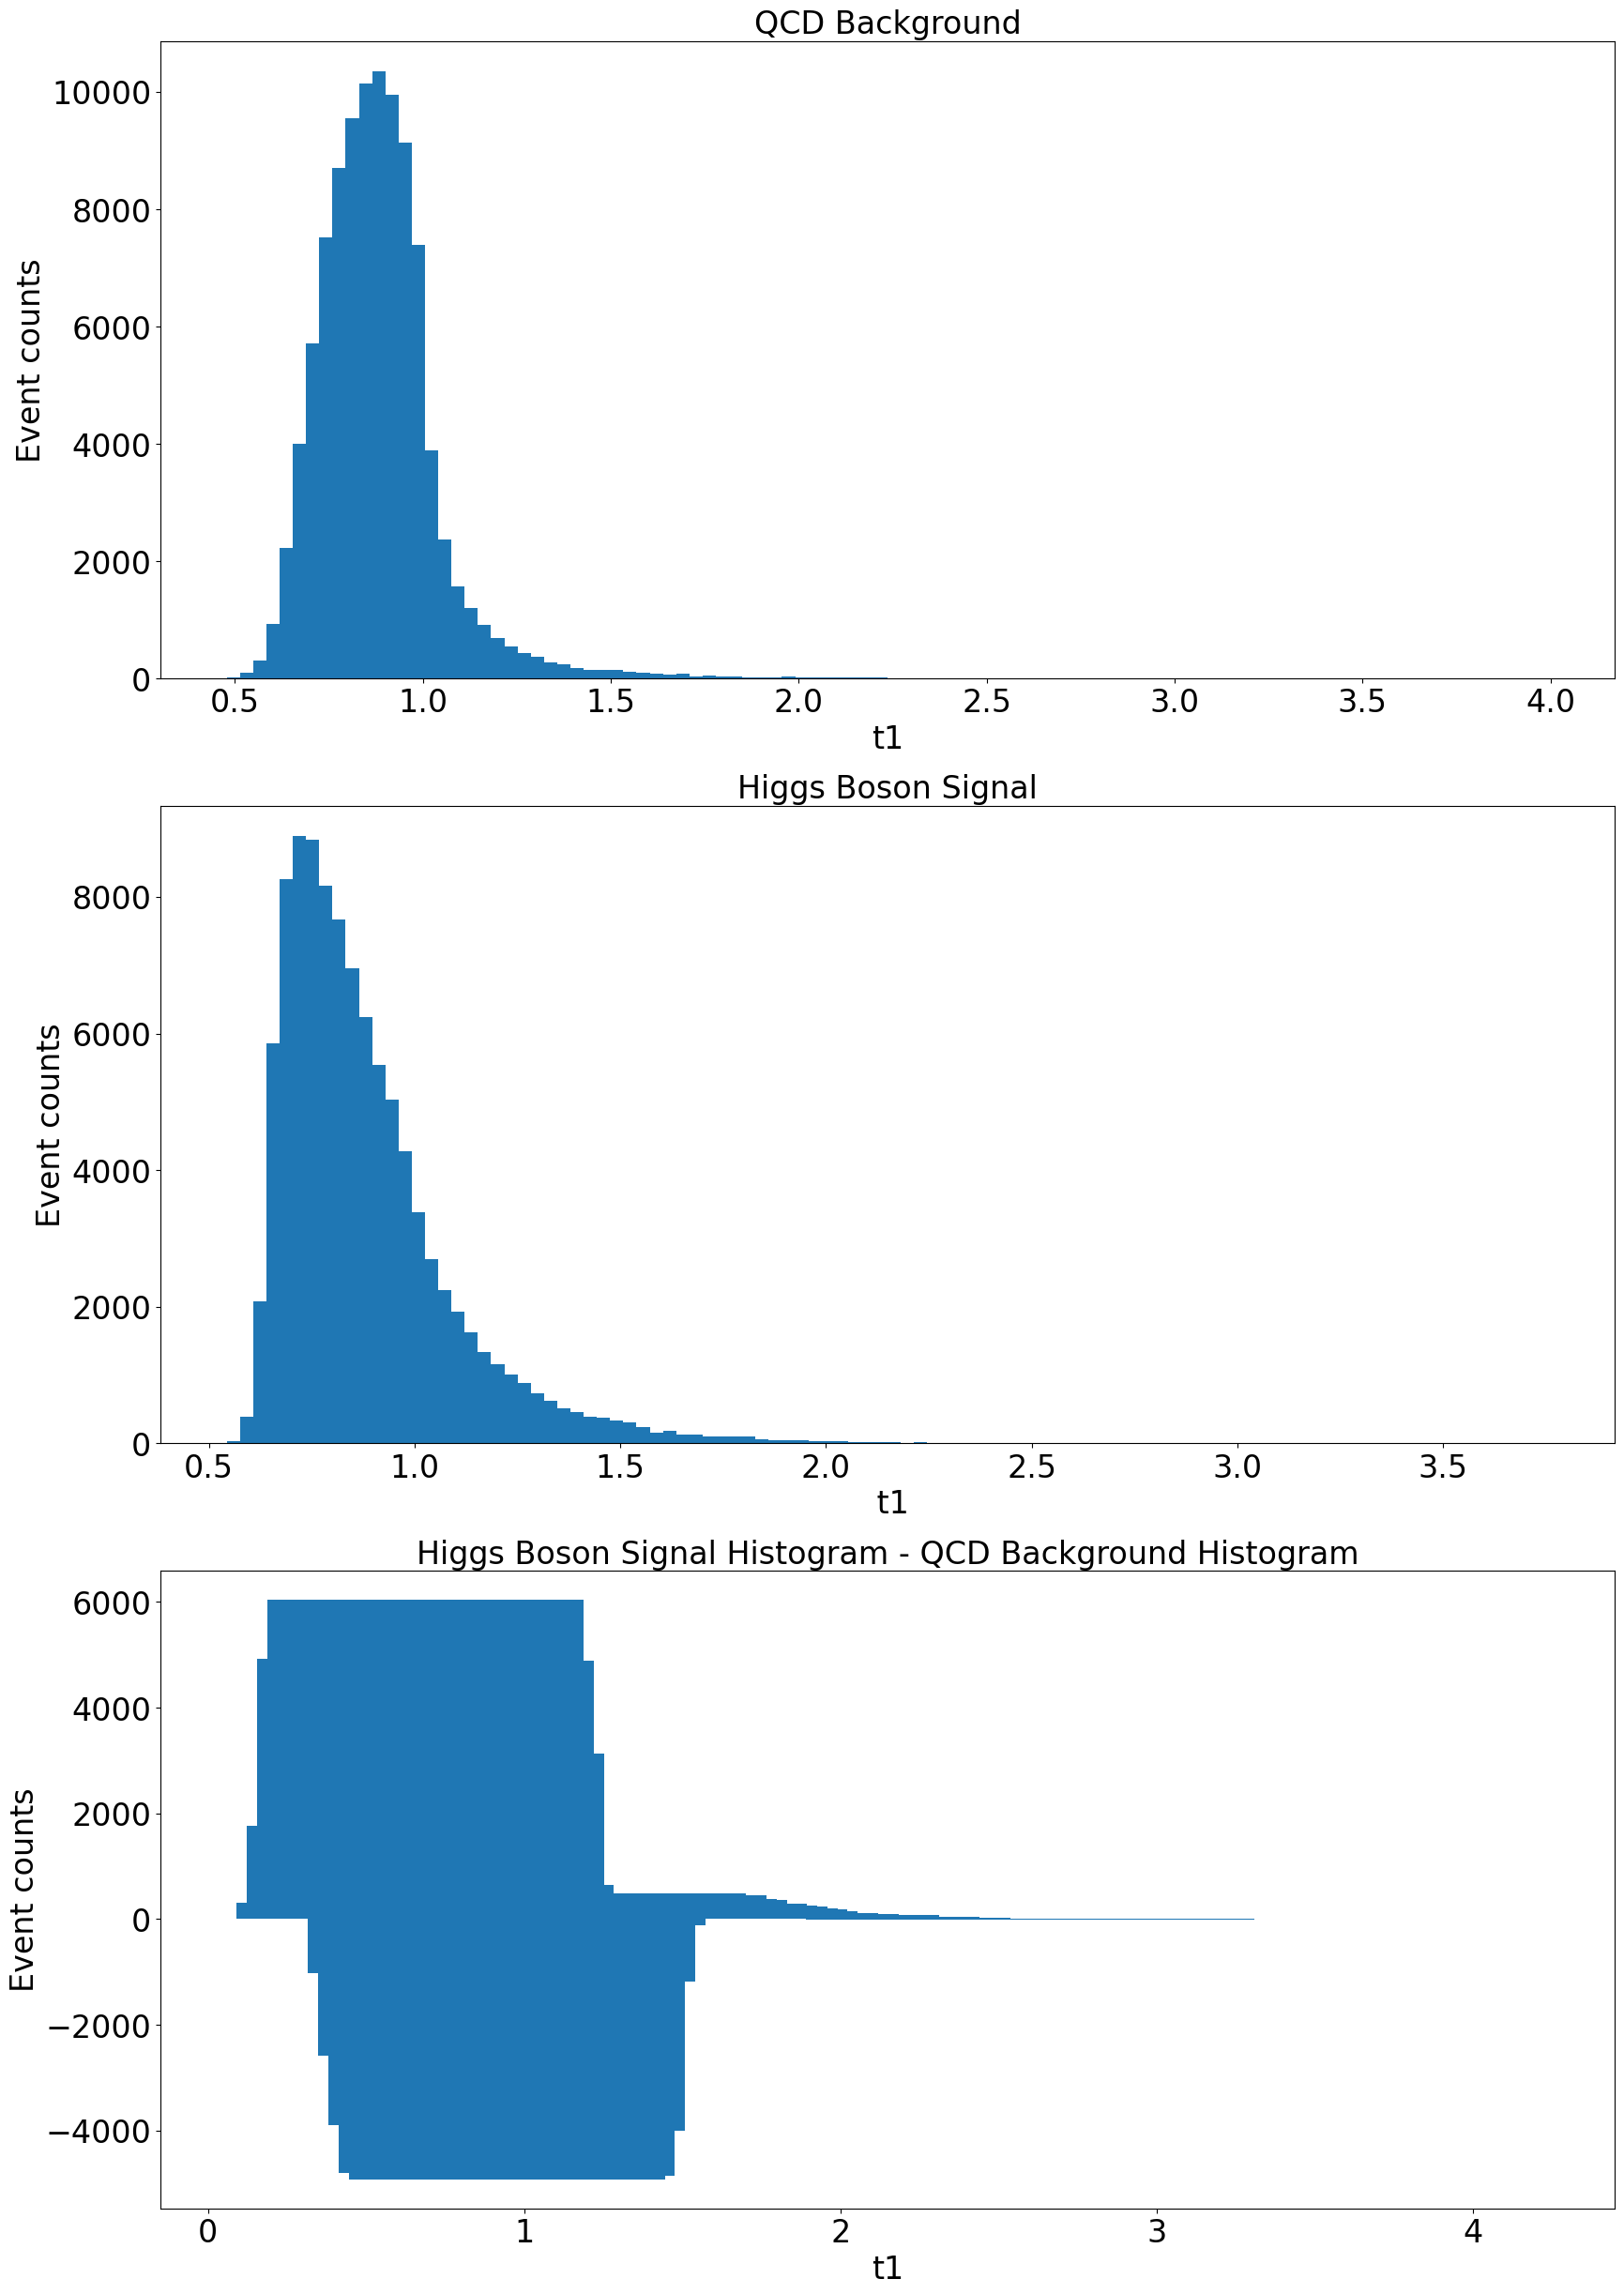

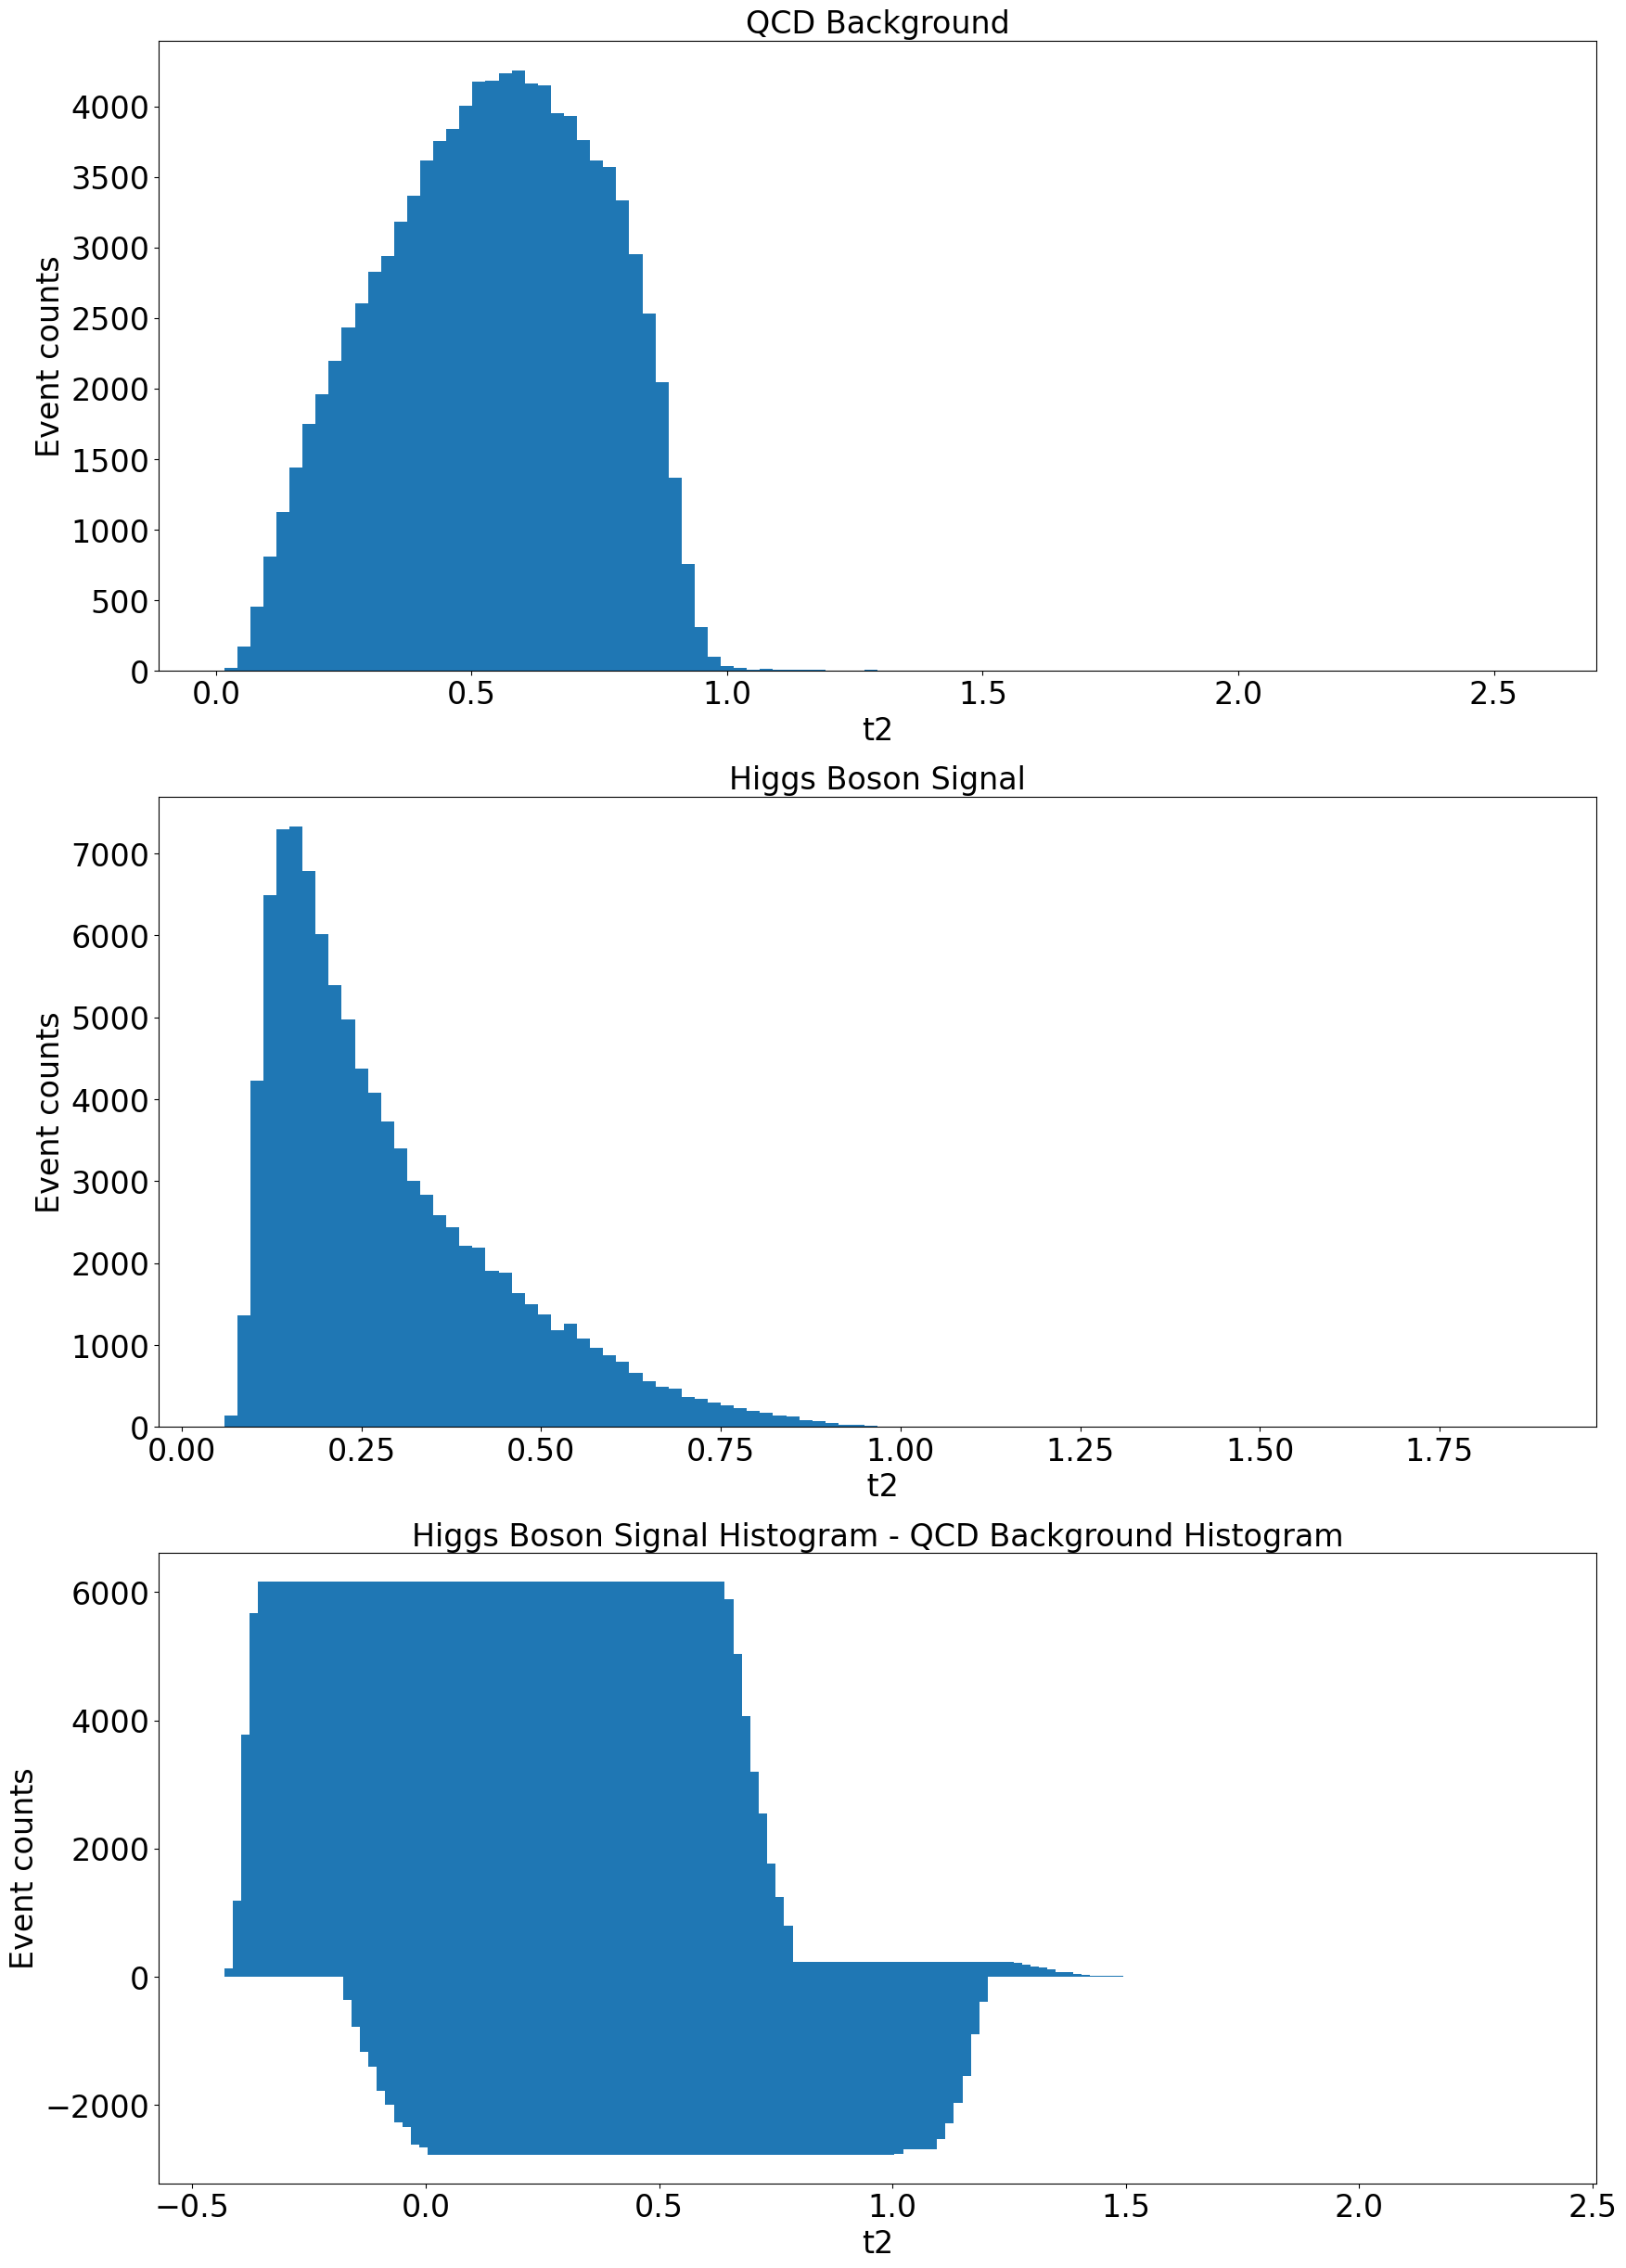

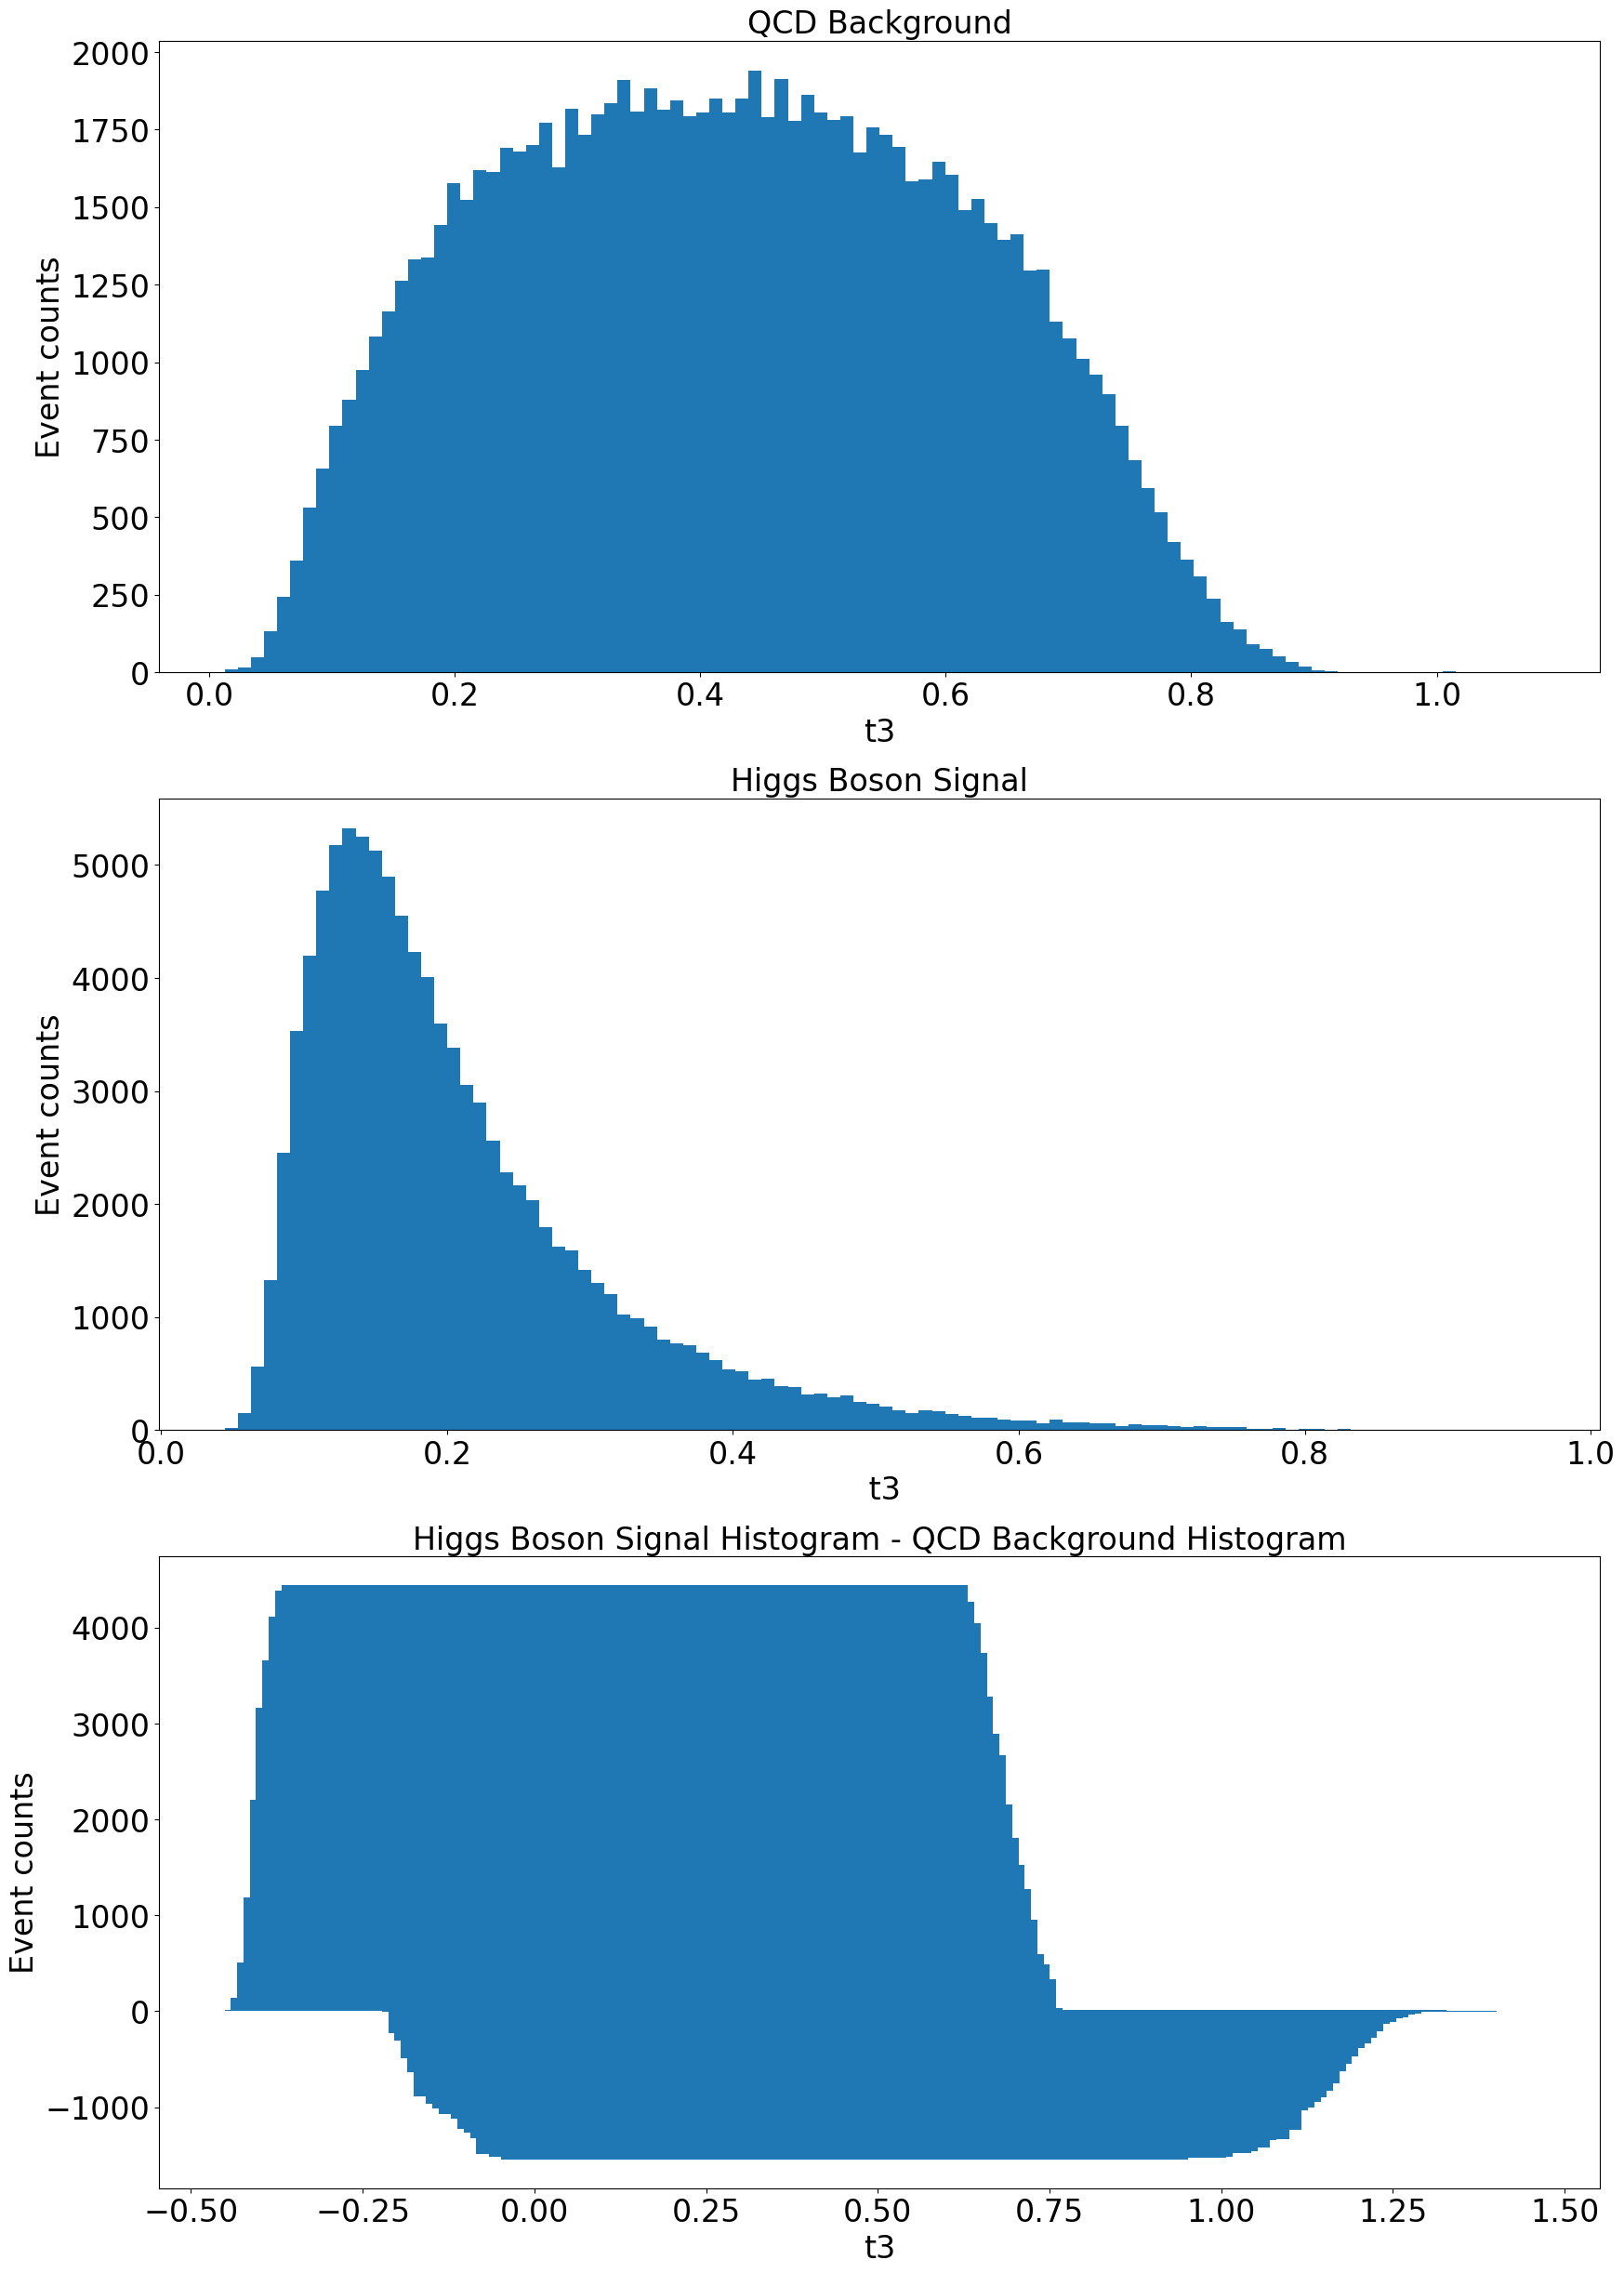

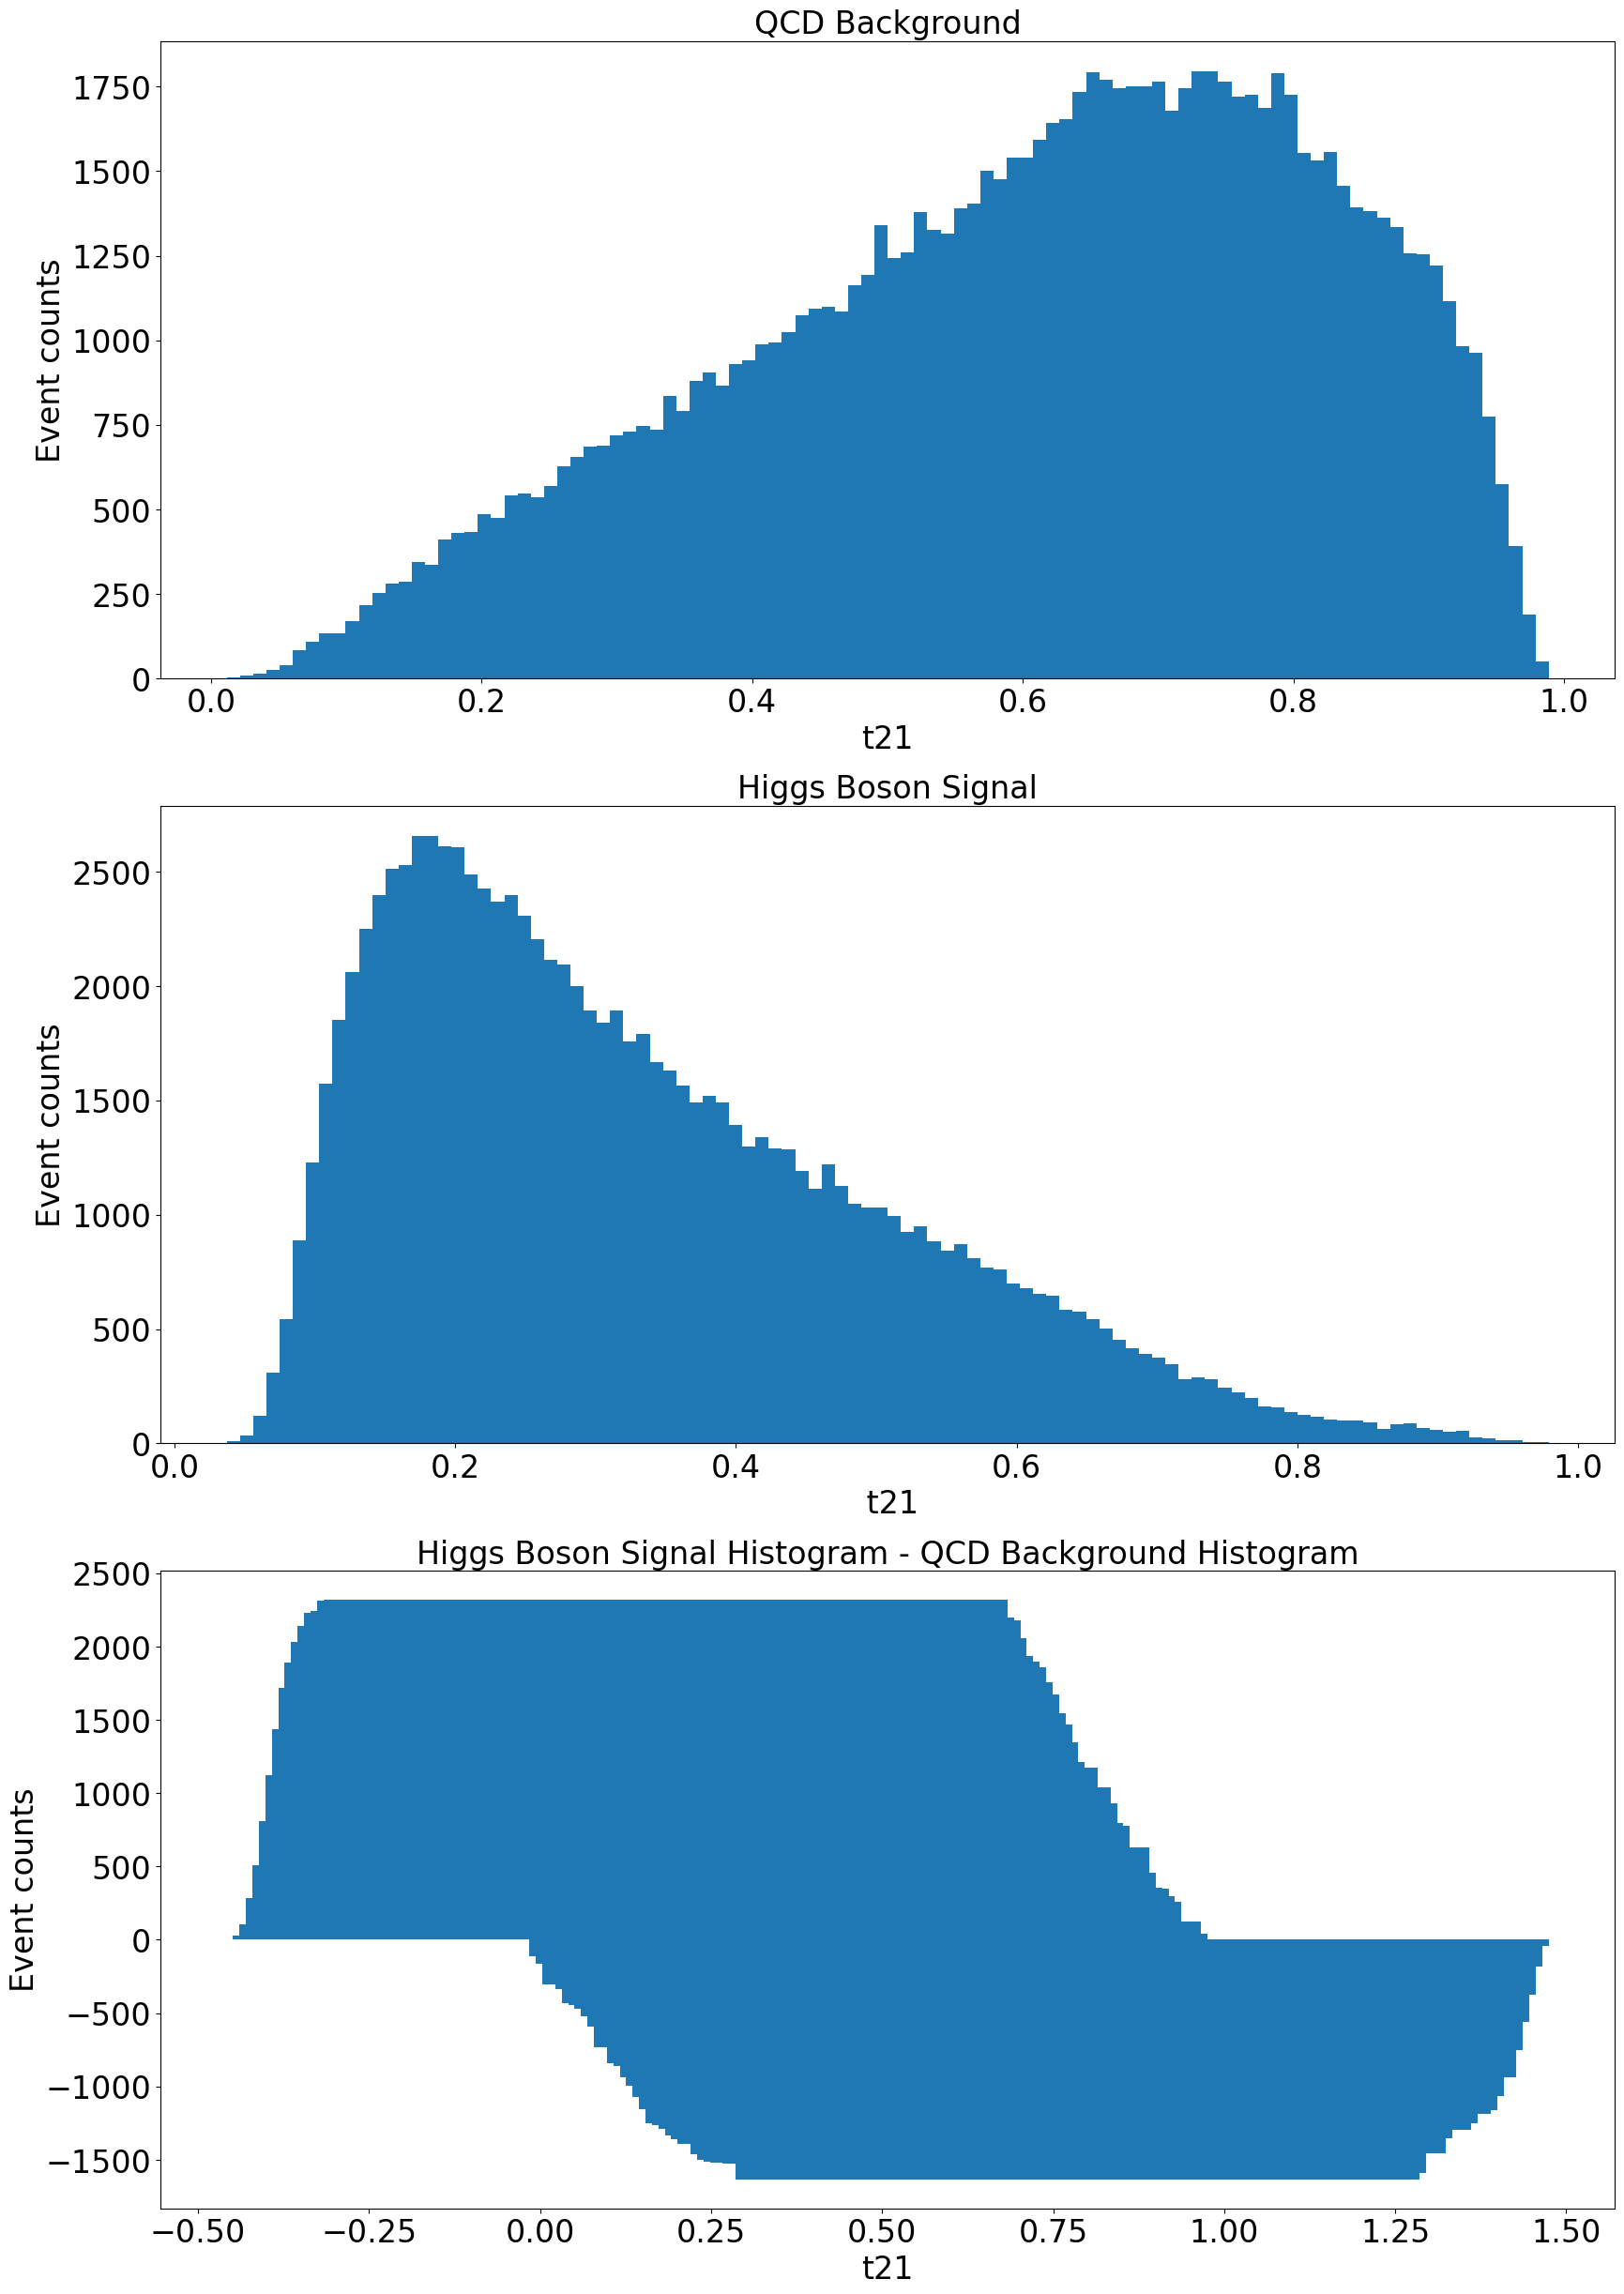

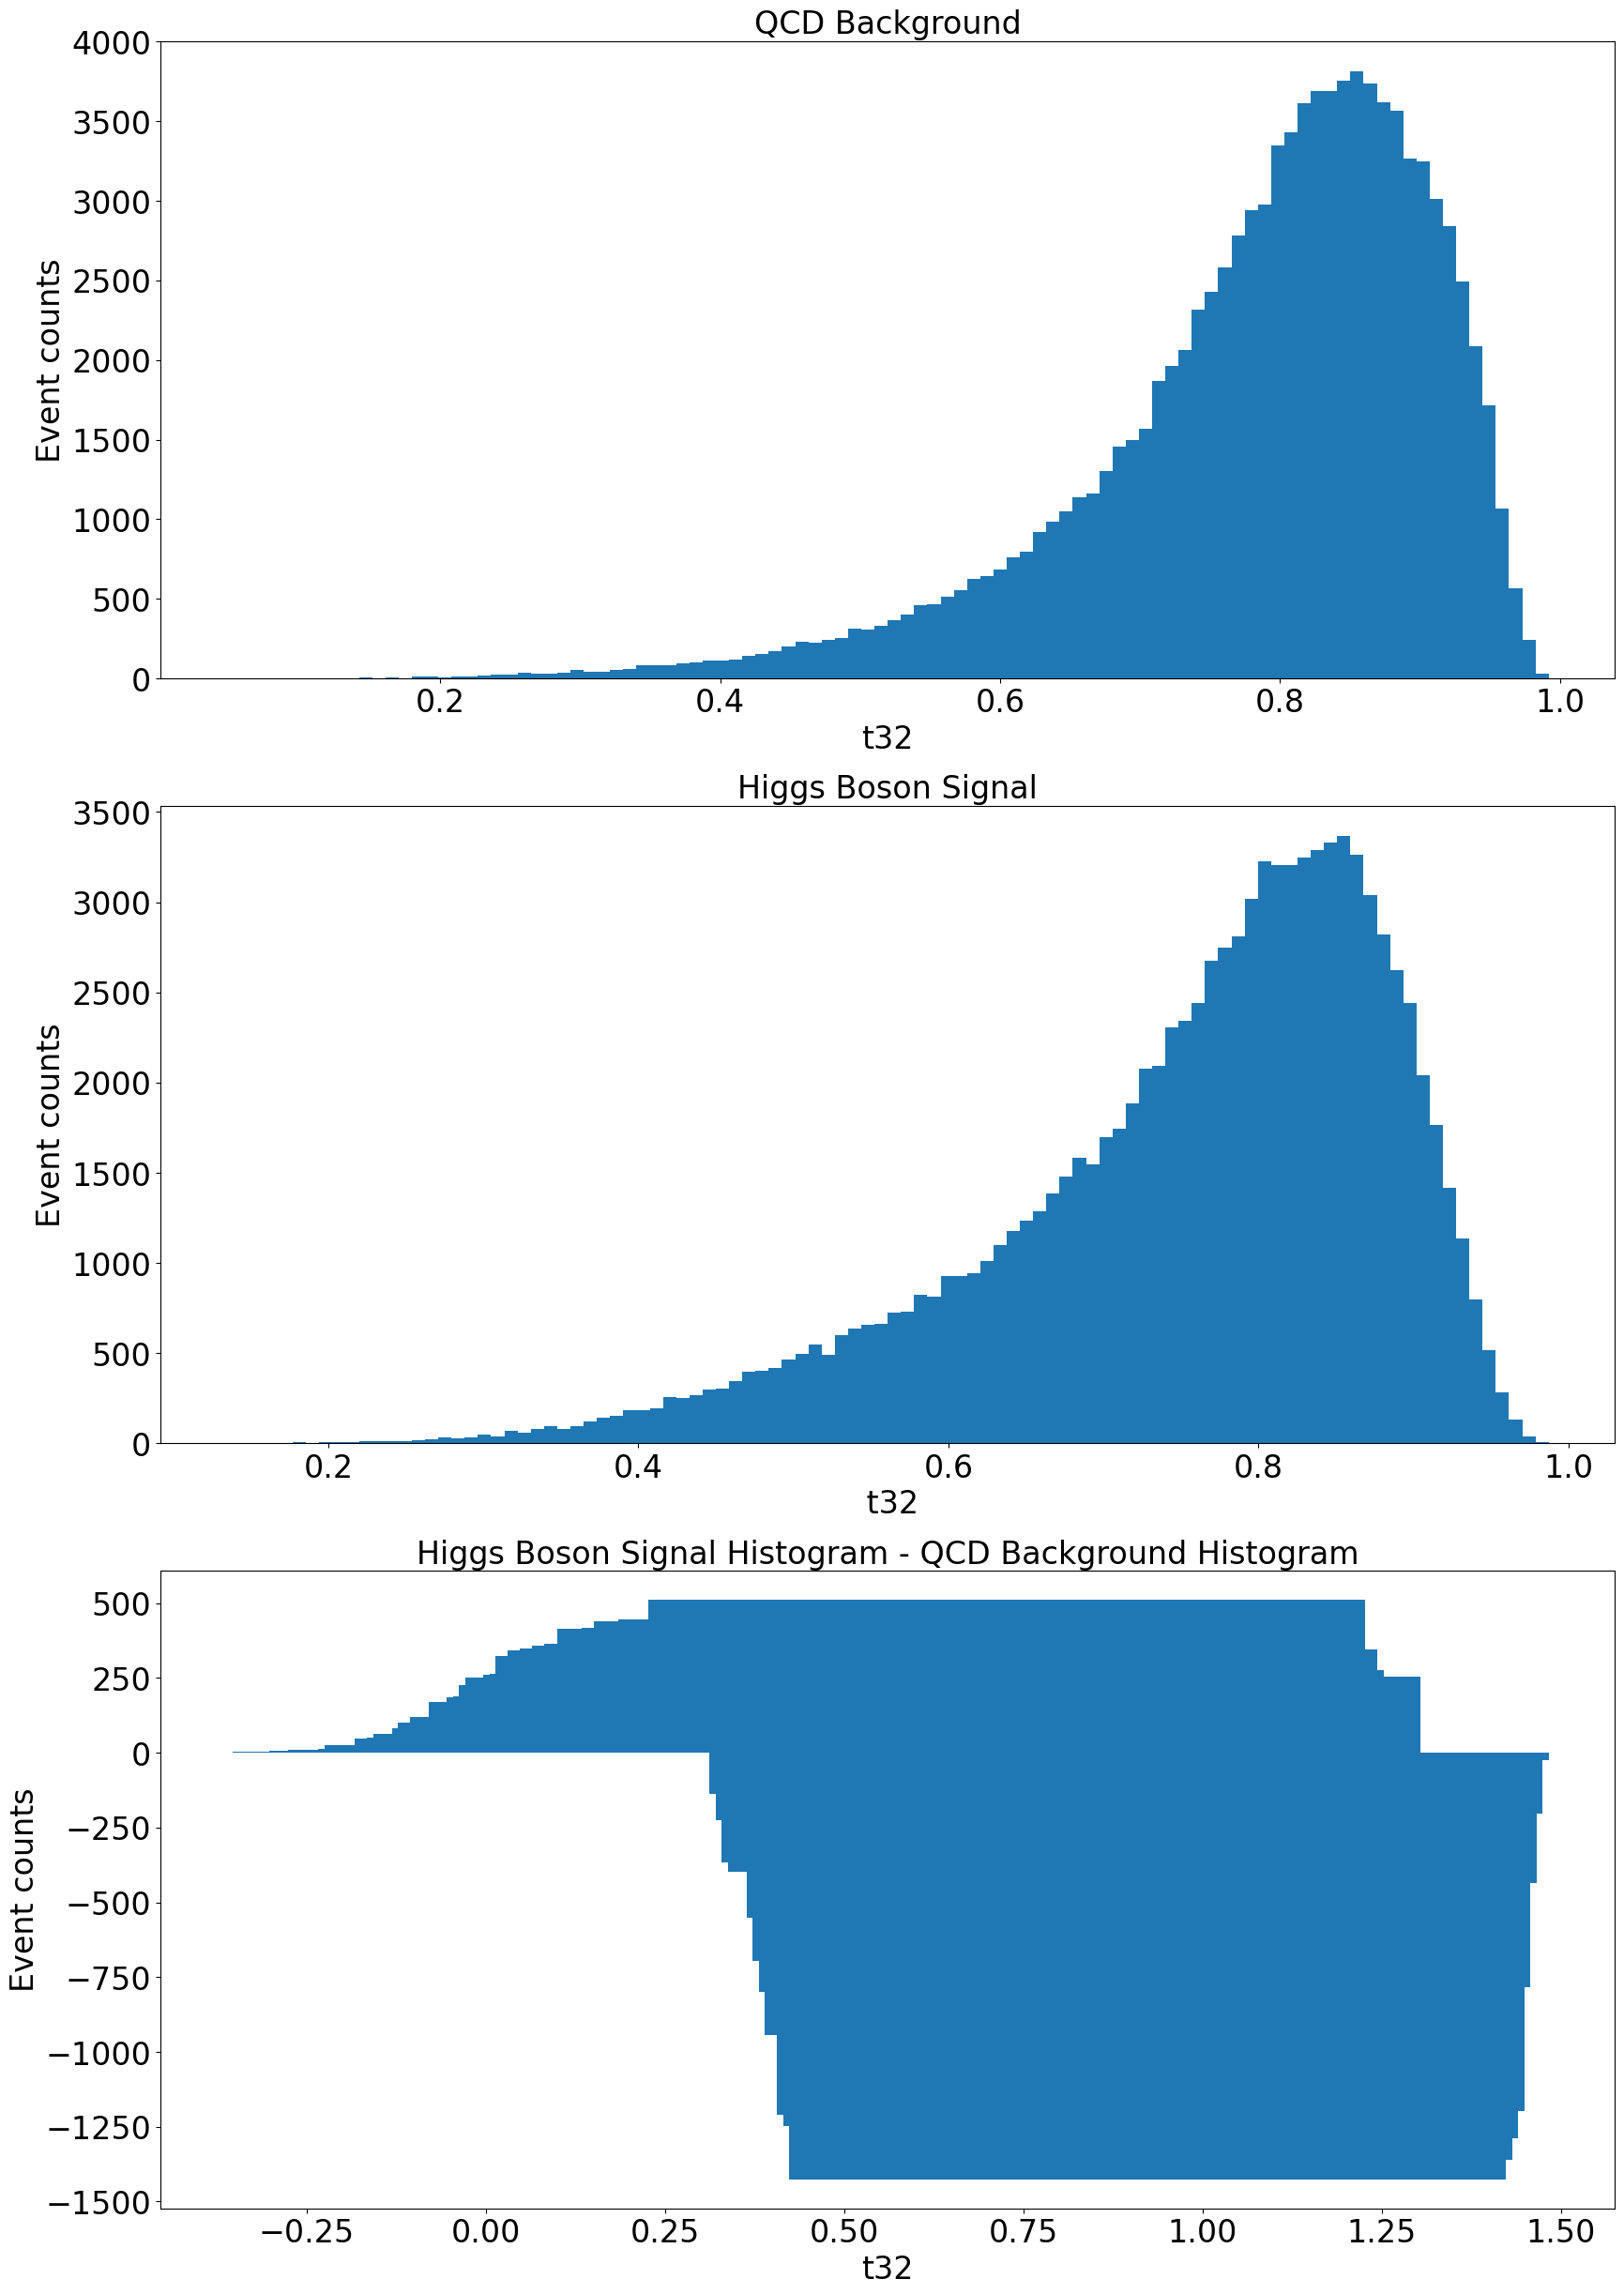

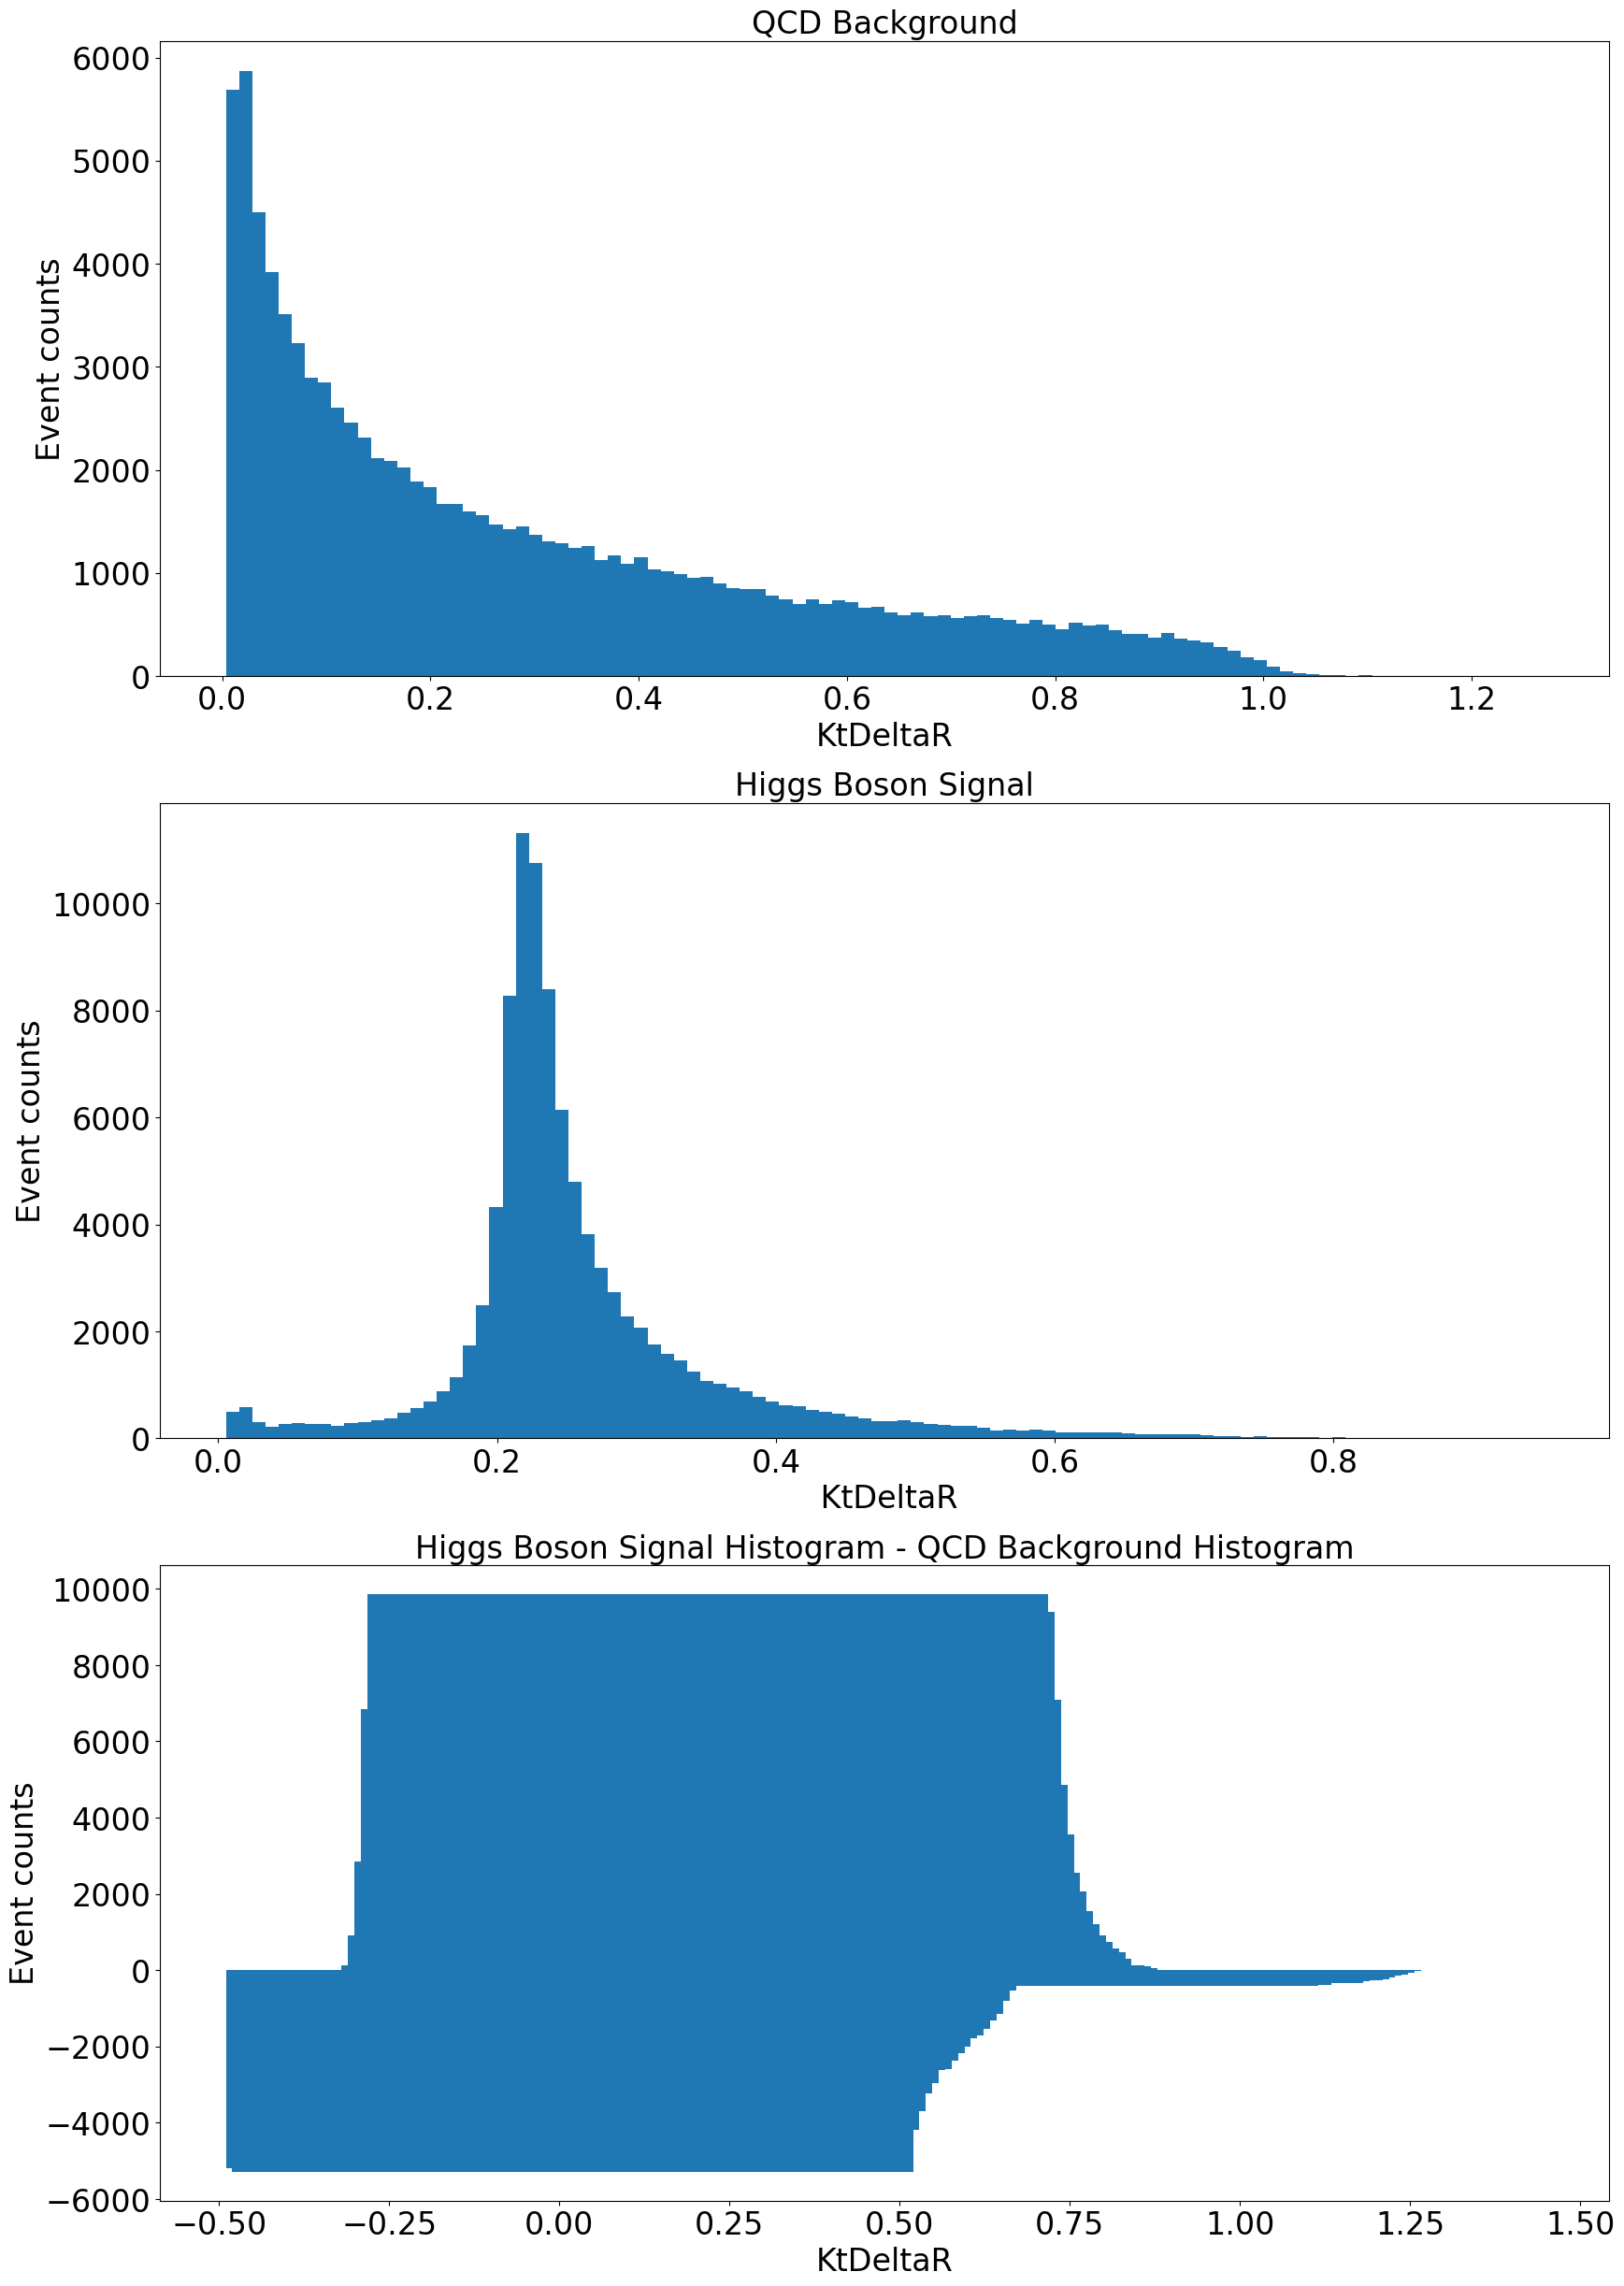

In [94]:
for key in higgsdata.keys():
    plot_metadata(key)

## Base Discovery Significance

To begin to explore how we can identify the Higgs Boson through proton-proton collisions we simulated 100k collisions that produced Higgs Bosons and 100k collisions that produced QCD background particles.  These simulations do not provide the true values that we would have observed in a real experiment.  The expected yield for the number of Higgs Boson's to be identified is 50 while the expected yield for the number of QCD background particles to be identified is 2000.

Now we can compute the following ratios which will allow us to compute the expected yield provided any number of simulated data points:

$$R_{higgs} = \frac{50}{100000} = 0.0005$$

$$R_{qcd} = \frac{2000}{100000} = 0.02$$

With these ratios if we wanted to determine the expected yield of an arbitrary number of some observable we can now compute that expected yield with $yield = N_{sim,obserable} * R_{observable}$ where our observable can be either the Higgs Boson or the QCD background particles.

Now with our base simulation of 100k particles, I would like to ask the following questions to see what significance is required when the Higgs Boson does or does not exist:

> How many particles must must the QCD background (assuming that the Higgs does not exist) produce such that the probability of producing that many particles is 5-sigma?

> How many particles must must the QCD background (assuming that the Higgs does exist) produce such that the probability of producing that many particles is 5-sigma?

Now we lets answer these questions:

In [15]:
def compute_poisson_sigma_value(lambda_, value):
    # determine the probability associated with this value
    value_prob = stats.poisson.sf(value, lambda_)

    # use the inverse survival function to determine the sigma that has the same associated probability
    sigma = stats.norm.isf(value_prob)

    return sigma

def compute_poisson_5sigma_value(lambda_):
    # define the sigma value
    sigma = 5

    # use the inverse survival function to determine the probability associated with 5sigma
    prob_sigma = stats.norm.sf(sigma)
    
    # determine the value associated with this probability
    value = stats.poisson.isf(prob_sigma, lambda_)

    return value

# define the distribution parameters
qcd_base_lambda_1 = 2000
qcd_higgs_lambda_1 = 2050

# determine the value associated with a 5-sigma probability for each distribution
qcd_base_value_1 = compute_poisson_5sigma_value(qcd_base_lambda_1)
qcd_higgs_value_1 = compute_poisson_5sigma_value(qcd_higgs_lambda_1)
print(f'The value required for a 5-sigma probability for the QCD Background without the Higgs Boson is {qcd_base_value_1}')
print(f'The value required for a 5-sigma probability for the QCD Background with the Higgs Boson is {qcd_higgs_value_1}')

The value required for a 5-sigma probability for the QCD Background without the Higgs Boson is 2228.0
The value required for a 5-sigma probability for the QCD Background with the Higgs Boson is 2280.0


From the above we see that the expected discovery sensitivity is 2280 particles for both the background without the Higgs Boson and with the Higgs Boson.  Provided our experiment, we only would have measured 50 Higgs Bosons when measuring 2000 QCD background particles thus with the above metrics we would be unable to claim a discovery of the Higgs Boson.  Our goal going forward is to use this data set from the LHC to devise a method to detect Higgs Bosons.

From the above we found that in order for us to be able to claim a discovery of the Higgs Boson we must increase the senitivity of our experiment.  We can increase this senstivity by removing data based on certain criteria.  One example is the following: we know that the Higgs Boson has a mass of approximately 125 GeV/c.  Thus we could imagine throwing away all of the data entries in the QCD set and the Higgs set that do not have a mass in the range of $125 \pm 15$ GeV/c.  This would decrease the overall number of simulated data points (and thus decrease the expected yields based on the ratios defined above) which should increase the sensitivity of our experiment.  This is one example, however our goal is to identify corrolations between metadata within our data and find metadata values that influence the probability of a particle being a Higgs Boson.  From analysis performed earlier in this lab, we can explore optimizing our dataset to increase our discovery sensitivity by considering cuts on the following parameters:

# TODO - Identify relevant and not relevant metadata values.

In [16]:
# lab writeup notes:

# to determine if there is a feature that provides discrimination power between the signal and the background
# compute the histogram bins for each of them and then subtract them from one another then plot the histogram
    # if there is not much of a plot then this variable does not provide discrimination - if there are peaks then it does.
    
# to determine if there is corrolations between features we will plot all of the plots that we found that provide discrimination
# side by side (ie for the background, plot a 5x2 thing of the 10 features that we found in the previous step - total number may 
# not be 10 - then we can do the same for the signal to see if the same corrolation exists)

# compute the discovery sensitivity? Should find:
    # higgs_100000_pt_1000_1200.pkl (Expected yields  𝑁ℎ𝑖𝑔𝑔𝑠=50)
    # qcd_100000_pt_1000_1200.pkl (Expected yields  𝑁𝑞𝑐𝑑=2000)
        # generate a large number of events to get a good understanding of the physics but this does not
        # tell us what number of events we would see when we turn the experiment on
        # if you have physics with higgs boson not existing we get 2000 events.  if we have physics with higgs boson existing
        # then we get a total of 2050 events
        
    # from these we can write down the ratio - 50/100k and 2000/100k.  this provides us ratios to determine what the expected
    # yield of a subset of the data is (ie I used mass to eliminate some of the background which maybe reduces me from 100k
    # to 90k.  Thus I know that with this consideration (or limitation) that my expected yield is 90k * (50 / 100k).  Do the
    # same for the background qcd events.  With these new expected yields we can create Poisson distributions and calculate
    # our significance)
    
# how many events you see based is based on how long you look and how probable an event is


# EVERYTHING IS POISSON DISTRIBUTED (the higgs and qcd)

In [ ]:
# of the 100000 how do we know what to keep and what to throw away
    # need to do simulation 100000 times so that we can get a good idea of the distirbution but that's 
